## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import sqlite3

In [2]:
movie_data = pd.read_csv('Data/bom.movie_gross.csv.gz')

In [3]:
movie_data #keep all 

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [4]:
!ls data

bom.movie_gross.csv.gz  rt.movie_info.tsv.gz    tn.movie_budgets.csv.gz
im.db                   rt.reviews.tsv.gz
im.db.zip               tmdb.movies.csv.gz


In [5]:
path = 'data/im.db'
conn = sqlite3.connect(path)

In [6]:
pd.read_sql('''
SELECT *
FROM sqlite_master  
WHERE type='table'; ''', conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


## Overview of Data

In [7]:
df = '''
SELECT *
FROM principals
JOIN persons
    USING(person_id)
JOIN movie_basics
    USING(movie_id)
JOIN movie_ratings
    USING(movie_id)
WHERE category == "director"
ORDER BY averagerating DESC
'''
df = pd.read_sql(df,conn)
df.head() # 77,0000 total values 

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt10176328,1,nm10616933,director,None,None,Ivana Diniz,NaN,NaN,"director,writer",Exteriores: Mulheres Brasileiras na Diplomacia,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52.0,Documentary,10.0,5
1,tt1770682,5,nm4166962,director,None,None,Daniel Alexander,NaN,NaN,director,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.0,"Crime,Documentary",10.0,5
2,tt2632430,1,nm0880350,director,None,None,Mohamed Ulad-Mohand,NaN,NaN,"producer,director,writer",Hercule contre Hermès,Hercule contre Hermès,2012,72.0,Documentary,10.0,5
3,tt4109192,3,nm3656924,director,None,None,Soudabeh Moradian,1972.0,NaN,"director,editor,producer",I Was Born Yesterday!,I Was Born Yesterday!,2015,31.0,Documentary,10.0,6
4,tt4944240,5,nm6893562,director,None,None,Chad Carpenter,NaN,NaN,"director,producer,miscellaneous",Dog Days in the Heartland,Dog Days in the Heartland,2017,NaN,Drama,10.0,5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77452 entries, 0 to 77451
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            77452 non-null  object 
 1   ordering            77452 non-null  int64  
 2   person_id           77452 non-null  object 
 3   category            77452 non-null  object 
 4   job                 3073 non-null   object 
 5   characters          0 non-null      object 
 6   primary_name        77452 non-null  object 
 7   birth_year          21642 non-null  float64
 8   death_year          622 non-null    float64
 9   primary_profession  77369 non-null  object 
 10  primary_title       77452 non-null  object 
 11  original_title      77452 non-null  object 
 12  start_year          77452 non-null  int64  
 13  runtime_minutes     69596 non-null  float64
 14  genres              76721 non-null  object 
 15  averagerating       77452 non-null  float64
 16  numv

In [9]:
df.describe()

,ordering,birth_year,death_year,start_year,runtime_minutes,averagerating,numvotes
count,77452.000000,21642.000000,622.000000,77452.000000,69596.000000,77452.000000,7.745200e+04
mean,4.633308,1967.742168,2014.797428,2014.271910,95.792574,6.349827,3.589331e+03
std,1.412261,12.442609,5.087713,2.611226,296.763786,1.465571,3.067076e+04
min,1.000000,1870.000000,1944.000000,2010.000000,3.000000,1.000000,5.000000e+00
25%,5.000000,1960.000000,2013.000000,2012.000000,81.000000,5.500000,1.400000e+01
50%,5.000000,1969.000000,2016.000000,2014.000000,91.000000,6.500000,5.000000e+01
75%,5.000000,1977.000000,2017.000000,2016.000000,104.000000,7.400000,2.820000e+02
max,10.000000,2004.000000,2019.000000,2019.000000,51420.000000,10.000000,1.841066e+06


In [10]:
df['category'].value_counts().head(25)

director    77452
Name: category, dtype: int64

In [11]:
df.isna().sum()

movie_id                  0
ordering                  0
person_id                 0
category                  0
job                   74379
characters            77452
primary_name              0
birth_year            55810
death_year            76830
primary_profession       83
primary_title             0
original_title            0
start_year                0
runtime_minutes        7856
genres                  731
averagerating             0
numvotes                  0
dtype: int64

In [12]:
df = df.dropna(subset='job')


In [13]:
df.isna().sum()

movie_id                 0
ordering                 0
person_id                0
category                 0
job                      0
characters            3073
primary_name             0
birth_year            2652
death_year            3057
primary_profession       7
primary_title            0
original_title           0
start_year               0
runtime_minutes        255
genres                  12
averagerating            0
numvotes                 0
dtype: int64

In [14]:
df

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
60,tt7385120,1,nm4763959,director,co-director,None,Alessandro Cassigoli,NaN,NaN,"director,writer,editor",The Things We Keep,The Things We Keep,2018,73.0,Documentary,9.6,5
61,tt7385120,2,nm9279895,director,co-director,None,Casey Kauffman,NaN,NaN,"director,writer",The Things We Keep,The Things We Keep,2018,73.0,Documentary,9.6,5
70,tt6014396,2,nm8398404,director,co-director,None,Sam Radutzky,NaN,NaN,"director,writer,cinematographer",Do U Want It?,Do U Want It?,2017,95.0,"Documentary,Music",9.5,61
73,tt5963218,6,nm8529623,director,co-director,None,Bharatha Hettiarachchi,NaN,NaN,"special_effects,director,assistant_director",Aloko Udapadi,Aloko Udapadi,2017,113.0,"Drama,History",9.5,6509
81,tt8539876,1,nm5466523,director,co-director,None,Josepmaria Anglès,1991.0,NaN,"camera_department,writer,editor",Faraway Land,Faraway Land,2018,78.0,Documentary,9.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77203,tt3596376,6,nm2847928,director,co-director,None,King Palisoc,NaN,NaN,"director,writer,miscellaneous",Bang Bang Alley,Bang Bang Alley,2014,117.0,"Crime,Drama",1.6,34
77204,tt3596376,7,nm2940573,director,co-director,None,Yan Yuzon,NaN,NaN,"miscellaneous,actor,director",Bang Bang Alley,Bang Bang Alley,2014,117.0,"Crime,Drama",1.6,34
77235,tt2399531,2,nm5707207,director,co-director,None,Marc Roussel,NaN,NaN,director,The Oath of Tobruk,Le serment de Tobrouk,2012,100.0,Documentary,1.5,73
77356,tt2460690,6,nm4903346,director,second director,None,Wen-Han Shih,NaN,NaN,"producer,director,editor",Westgate Tango,Xi men ding,2012,111.0,"Comedy,Romance",1.1,500


## Drama Directors

In [15]:
## Merge SQL Tables together and then create a pandas dataframe where the category is director
## Filter Pandas dataframe for each genre including all categories of drama
## Filter Pandas dataframe for all average ratings above 8.0

In [16]:
drama = '''
SELECT *
FROM principals
JOIN persons
    USING(person_id)
JOIN movie_basics
    USING(movie_id)
JOIN movie_ratings
    USING(movie_id)
WHERE category == "writer" 
ORDER BY averagerating DESC
'''
drama = pd.read_sql(drama,conn)
drama
drama = drama.loc[(drama['genres']== 'Drama') |(drama['genres']== 'Action,Drama,Mystery') | (drama['genres']== 'Drama,Romance') | (drama['genres']== 'Comedy,Drama')]
drama = drama.loc[drama['averagerating']> 8.5]
drama

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
24,tt7842888,6,nm5214927,writer,None,None,Tung-Ting Sung,NaN,NaN,"director,writer",Never-Ending Road,Never-Ending Road,2017,111.0,Drama,9.5,84
64,tt10380266,4,nm10716192,writer,script,None,Sathar Nabee,NaN,NaN,None,Adutha Chodyam,Adutha Chodyam,2019,112.0,Drama,9.3,587
86,tt5593384,6,nm1802885,writer,novel,None,Anton Hansen Tammsaare,1878.0,1940.0,writer,Truth and Justice,Tõde ja õigus,2019,165.0,Drama,9.3,1220
99,tt7251048,7,nm0000636,writer,"play ""The Tragedy of Hamlet, Prince of Denmark",None,William Shakespeare,1564.0,1616.0,"writer,soundtrack,miscellaneous",Hamlet in the Golden Vale,Hamlet in the Golden Vale,2018,120.0,Drama,9.3,36
103,tt8105580,7,nm9426202,writer,screenplay,None,Xinrui Li,NaN,NaN,"writer,actor,producer",Christian Movie: Yearning,Christian Movie: Yearning,2018,NaN,Drama,9.3,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,tt7974204,7,nm8161167,writer,writer,None,Girry Pratama,NaN,NaN,"producer,writer",Revan & Reina,Revan & Reina,2018,98.0,Drama,8.6,25
1404,tt7227412,6,nm2672353,writer,co-writer,None,David Saldaña,NaN,NaN,"writer,actor,producer",Rich Kids,Rich Kids,2018,96.0,Drama,8.6,38
1406,tt7512582,6,nm7380073,writer,written by,None,Boonaa Mohammed,1987.0,NaN,"writer,producer,actor",Detainee X,Detainee X,2018,80.0,Drama,8.6,13
1407,tt6440150,6,nm8619476,writer,None,None,Bishwanath Parajuli,NaN,NaN,writer,KTM Cocktale,KTM Cocktale,2017,90.0,Drama,8.6,23


In [17]:
drama = '''
SELECT *
FROM principals
JOIN persons
    USING(person_id)
JOIN movie_basics
    USING(movie_id)
JOIN movie_ratings
    USING(movie_id)
WHERE category == "director" 
ORDER BY averagerating DESC
'''
drama = pd.read_sql(drama,conn)
drama
drama = drama.loc[(drama['genres']== 'Drama') |(drama['genres']== 'Action,Drama,Mystery') | (drama['genres']== 'Drama,Romance') | (drama['genres']== 'Comedy,Drama')]
drama = drama.loc[drama['averagerating']> 8.5]
#(drama['averagerating'] > 7.0)]
#drama = drama.loc[drama['numvotes']< 1000]
#drama = drama.loc[drama['averagerating']> 7.0]
drama

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
4,tt4944240,5,nm6893562,director,None,None,Chad Carpenter,NaN,NaN,"director,producer,miscellaneous",Dog Days in the Heartland,Dog Days in the Heartland,2017,NaN,Drama,10.0,5
19,tt9537008,4,nm10369569,director,None,None,Nagaraja Uppunda,NaN,NaN,director,Gini Helida Kathe,Gini Helida Kathe,2019,138.0,Drama,9.9,417
41,tt8718580,5,nm9982663,director,None,None,Arsel Arumugam,NaN,NaN,None,Eghantham,Eghantham,2018,125.0,Drama,9.7,639
42,tt7131622,5,nm0000233,director,None,None,Quentin Tarantino,1963.0,NaN,"writer,actor,producer",Once Upon a Time ... in Hollywood,Once Upon a Time ... in Hollywood,2019,159.0,"Comedy,Drama",9.7,5600
87,tt7842888,5,nm0151663,director,None,None,Chi-Yung Chang,NaN,NaN,"director,assistant_director,producer",Never-Ending Road,Never-Ending Road,2017,111.0,Drama,9.5,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779,tt8804776,5,nm10030311,director,None,None,Saleh Jamal Eddin,NaN,NaN,"director,writer,producer",Ahmad Maryam,Ahmad Maryam,2018,NaN,"Drama,Romance",8.6,8
3783,tt7512582,5,nm7133026,director,None,None,Manee Osman,NaN,NaN,"director,cinematographer,producer",Detainee X,Detainee X,2018,80.0,Drama,8.6,13
3784,tt8446886,5,nm3901401,director,None,None,Isaac Cherem,NaN,NaN,"producer,director,writer",Leona,Leona,2018,NaN,Drama,8.6,38
3788,tt6440150,5,nm8619470,director,None,None,Anuska Rauniyar,NaN,NaN,"writer,director,cinematographer",KTM Cocktale,KTM Cocktale,2017,90.0,Drama,8.6,23


In [18]:
drama['primary_name'].value_counts().head()

Marcus Damone Henry    2
Kaushik Ganguly        2
Larry Rosen            2
Ivo van Hove           2
Marianne Elliott       2
Name: primary_name, dtype: int64

In [19]:
drama_mi = drama.loc[drama['primary_name']== 'Marcus Damone Henry']
drama_mi['averagerating_avg'] = drama_mi['averagerating'].sum()/len(drama_mi['averagerating'])
drama_mi

/var/folders/bm/m4lrvb8117nc1ks_2lybh8hc0000gn/T/ipykernel_827/1403856274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drama_mi['averagerating_avg'] = drama_mi['averagerating'].sum()/len(drama_mi['averagerating'])


,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,averagerating_avg
501,tt2375337,5,nm4550020,director,None,None,Marcus Damone Henry,NaN,NaN,"writer,producer,director",Nicki: A Hip Hop Love Story,Nicki: A Hip Hop Love Story,2012,NaN,Drama,9.2,6,8.9
3265,tt2010896,5,nm4550020,director,collaborating director,None,Marcus Damone Henry,NaN,NaN,"writer,producer,director",As I Die Slowly,As I Die Slowly,2011,124.0,Drama,8.6,7,8.9


In [20]:
drama_ga = drama.loc[drama['primary_name']== 'Kaushik Ganguly']
drama_ga['averagerating_avg'] = drama_ga['averagerating'].sum()/len(drama_ga['averagerating'])
drama_la = drama.loc[drama['primary_name']== 'Larry Rosen']
drama_la['averagerating_avg'] = drama_la['averagerating'].sum()/len(drama_la['averagerating'])
drama_iv = drama.loc[drama['primary_name']== 'Ivo van Hove']
drama_iv['averagerating_avg'] = drama_iv['averagerating'].sum()/len(drama_iv['averagerating'])
drama_ma = drama.loc[drama['primary_name']== 'Marianne Elliott']
drama_ma['averagerating_avg'] = drama_ma['averagerating'].sum()/len(drama_ma['averagerating'])

frames = [drama_mi,drama_ga,drama_la,drama_iv,drama_ma]
top_directors = pd.concat(frames)
top_directors

/var/folders/bm/m4lrvb8117nc1ks_2lybh8hc0000gn/T/ipykernel_827/1533841158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drama_ga['averagerating_avg'] = drama_ga['averagerating'].sum()/len(drama_ga['averagerating'])
/var/folders/bm/m4lrvb8117nc1ks_2lybh8hc0000gn/T/ipykernel_827/1533841158.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drama_la['averagerating_avg'] = drama_la['averagerating'].sum()/len(drama_la['averagerating'])
/var/folders/bm/m4lrvb8117nc1ks_2lybh8hc0000gn/T/ipykernel_827/1533841

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,averagerating_avg
501,tt2375337,5,nm4550020,director,None,None,Marcus Damone Henry,NaN,NaN,"writer,producer,director",Nicki: A Hip Hop Love Story,Nicki: A Hip Hop Love Story,2012,NaN,Drama,9.2,6,8.90
3265,tt2010896,5,nm4550020,director,collaborating director,None,Marcus Damone Henry,NaN,NaN,"writer,producer,director",As I Die Slowly,As I Die Slowly,2011,124.0,Drama,8.6,7,8.90
654,tt7808072,5,nm1907554,director,None,None,Kaushik Ganguly,1968.0,NaN,"actor,director,writer",Nagarkirtan,Nagarkirtan,2017,115.0,Drama,9.2,122,9.00
2301,tt6376792,4,nm1907554,director,None,None,Kaushik Ganguly,1968.0,NaN,"actor,director,writer",Dhumketu,Dhumketu,2016,NaN,Drama,8.8,83,9.00
934,tt7298028,5,nm3583561,director,None,None,Larry Rosen,NaN,NaN,"producer,director,writer",Death of Love,Death of Love,2017,NaN,"Drama,Romance",9.1,28,9.00
1935,tt6794770,3,nm3583561,director,None,None,Larry Rosen,NaN,NaN,"producer,director,writer",Gwendolyn,Gwendolyn,2017,NaN,Drama,8.9,8,9.00
3605,tt6203902,5,nm0396994,director,None,None,Ivo van Hove,1958.0,NaN,"director,actor,writer",National Theatre Live: A View from the Bridge,National Theatre Live: A View from the Bridge,2015,NaN,Drama,8.6,103,8.60
3791,tt9652730,5,nm0396994,director,None,None,Ivo van Hove,1958.0,NaN,"director,actor,writer",National Theatre Live: All About Eve,National Theatre Live: All About Eve,2019,NaN,Drama,8.6,102,8.60
1373,tt6847810,5,nm2765738,director,None,None,Marianne Elliott,1966.0,NaN,"casting_department,director,miscellaneous",National Theatre Live: Angels in America Part ...,National Theatre Live: Angels in America Part ...,2017,220.0,Drama,9.0,252,8.95
1792,tt6846664,5,nm2765738,director,None,None,Marianne Elliott,1966.0,NaN,"casting_department,director,miscellaneous",National Theatre Live: Angels in America Part ...,National Theatre Live: Angels in America Part ...,2017,220.0,Drama,8.9,325,8.95


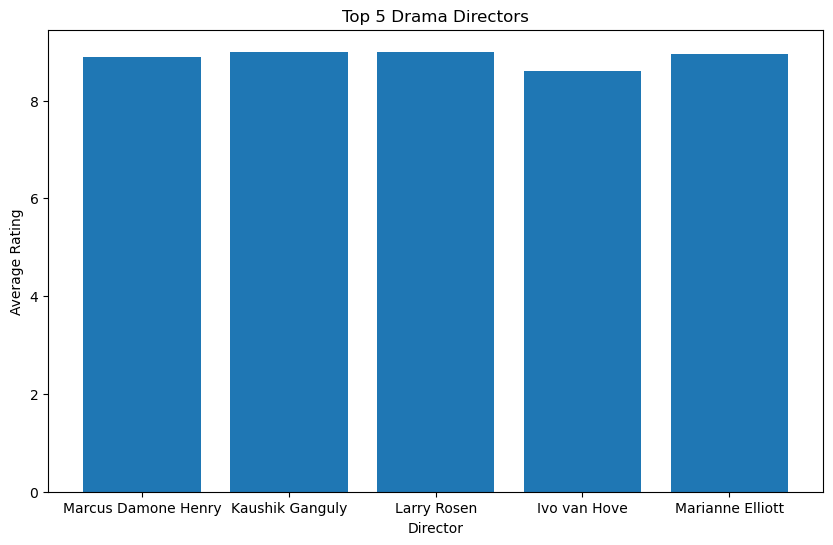

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.available
x = top_directors['primary_name']
y = top_directors['averagerating_avg']
director_count, ax = plt.subplots(figsize=(10, 6))
ax.bar(x,y)
abar_chart_title = ax.set_title('Top 5 Drama Directors')
bar_chart_count_label = ax.set_ylabel('Average Rating')
bar_chart_series_label = ax.set_xlabel('Director')

In [22]:
td = top_directors.loc[top_directors['averagerating'] > 8.85]
td

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,averagerating_avg
501,tt2375337,5,nm4550020,director,None,None,Marcus Damone Henry,NaN,NaN,"writer,producer,director",Nicki: A Hip Hop Love Story,Nicki: A Hip Hop Love Story,2012,NaN,Drama,9.2,6,8.90
654,tt7808072,5,nm1907554,director,None,None,Kaushik Ganguly,1968.0,NaN,"actor,director,writer",Nagarkirtan,Nagarkirtan,2017,115.0,Drama,9.2,122,9.00
934,tt7298028,5,nm3583561,director,None,None,Larry Rosen,NaN,NaN,"producer,director,writer",Death of Love,Death of Love,2017,NaN,"Drama,Romance",9.1,28,9.00
1935,tt6794770,3,nm3583561,director,None,None,Larry Rosen,NaN,NaN,"producer,director,writer",Gwendolyn,Gwendolyn,2017,NaN,Drama,8.9,8,9.00
1373,tt6847810,5,nm2765738,director,None,None,Marianne Elliott,1966.0,NaN,"casting_department,director,miscellaneous",National Theatre Live: Angels in America Part ...,National Theatre Live: Angels in America Part ...,2017,220.0,Drama,9.0,252,8.95
1792,tt6846664,5,nm2765738,director,None,None,Marianne Elliott,1966.0,NaN,"casting_department,director,miscellaneous",National Theatre Live: Angels in America Part ...,National Theatre Live: Angels in America Part ...,2017,220.0,Drama,8.9,325,8.95


In [23]:
td['primary_title'].unique()

array(['Nicki: A Hip Hop Love Story', 'Nagarkirtan', 'Death of Love',
       'Gwendolyn',
       'National Theatre Live: Angels in America Part Two - Perestroika',
       'National Theatre Live: Angels in America Part One - Millennium Approaches'],
      dtype=object)

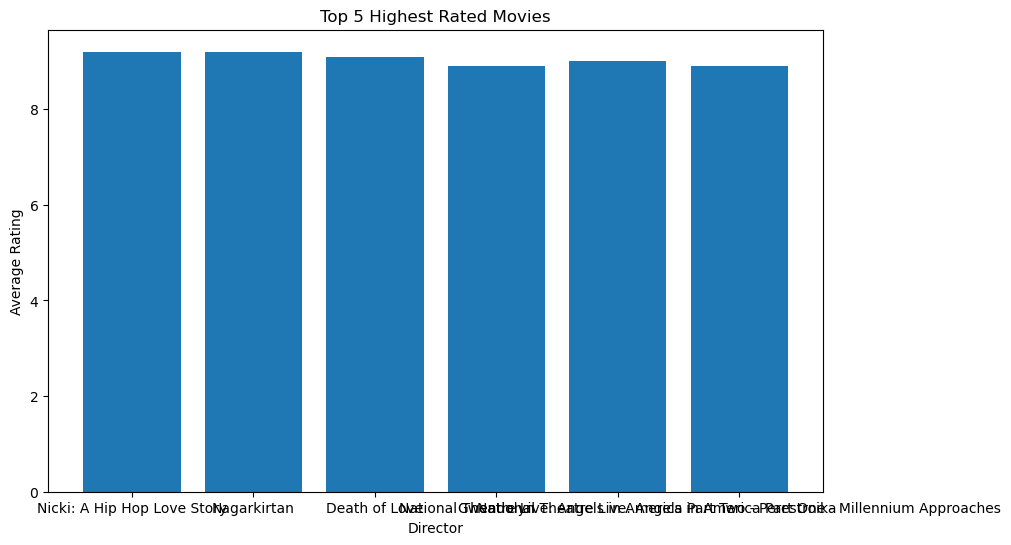

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.available
x = td['primary_title']
y = td['averagerating']
director_count, ax = plt.subplots(figsize=(10, 6))
ax.bar(x,y)
abar_chart_title = ax.set_title('Top 5 Highest Rated Movies')
bar_chart_count_label = ax.set_ylabel('Average Rating')
bar_chart_series_label = ax.set_xlabel('Director')

## Comedy Directors

In [25]:
comedy = '''
SELECT *
FROM principals
JOIN persons
    USING(person_id)
JOIN movie_basics
    USING(movie_id)
JOIN movie_ratings
    USING(movie_id)
WHERE category == "director" 
ORDER BY averagerating DESC
'''
comedy = pd.read_sql(comedy,conn)
comedy
comedy = comedy.loc[(comedy['genres']== 'Comedy') |(comedy['genres']== 'Comedy,Romance') | (comedy['genres']== 'Comedy,Drama,Romance') | (comedy['genres']== 'Comedy,Horror')]
comedy = comedy.loc[comedy['averagerating']> 8.5]
comedy

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
58,tt9680166,5,nm10436203,director,None,None,Abhinav Thakur,NaN,NaN,director,Yeh Suhaagraat Impossible,Yeh Suhaagraat Impossible,2019,92.0,Comedy,9.6,624
97,tt10084190,4,nm8589213,director,None,None,Karan R Guliani,NaN,NaN,director,Chandigarh amritsar chandigarh,Chandigarh amritsar chandigarh,2019,107.0,"Comedy,Drama,Romance",9.4,952
340,tt9127488,5,nm5462851,director,None,None,Tyler Falbo,1992.0,NaN,"director,sound_department,writer",Postal,Postal,2019,77.0,Comedy,9.3,10
359,tt8451712,5,nm1153627,director,None,None,Sam Friedlander,1978.0,NaN,"producer,production_manager,director",Babysplitters,Babysplitters,2019,119.0,Comedy,9.3,77
374,tt2064724,5,nm1714260,director,None,None,Matt Porter,1987.0,NaN,"producer,director,writer",Argyle,Argyle,2011,45.0,Comedy,9.2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3724,tt7243124,5,nm6845435,director,None,None,Thibault Turcas,1990.0,NaN,"editor,writer,producer",Partenaires Particuliers,Partenaires Particuliers,2018,84.0,Comedy,8.6,10
3725,tt7243124,6,nm5329470,director,None,None,Nicolas Vert,1989.0,NaN,"producer,director,writer",Partenaires Particuliers,Partenaires Particuliers,2018,84.0,Comedy,8.6,10
3761,tt8055324,5,nm9608985,director,None,None,Twila LaBar,NaN,NaN,"composer,director,actress",Blanche,Blanche,2018,NaN,Comedy,8.6,10
3768,tt8923800,5,nm3514888,director,None,None,Tremain Hayhoe,NaN,NaN,"actor,camera_department,producer",The Bachelor Party,The Bachelor Party,2018,115.0,Comedy,8.6,5


In [26]:
comedy['primary_name'].value_counts().head(20)

Mike Lordi               2
Beto Ribeiro             2
Carla Albuquerque        2
Pablo D'Stair            2
Abhinav Thakur           1
Vincent Shade            1
Ülviyya Könül            1
John Williams            1
Derrick Williams         1
Matt Ratner              1
Esses Tamás              1
Jacopo Manfren           1
Martin Khoshaba          1
Elena Tikhonova          1
Chris Redish             1
Rusty Rhodes             1
Joseph Voce              1
Edward G. Negron         1
Martine Blue             1
Stephanie Clattenburg    1
Name: primary_name, dtype: int64

In [27]:
comedy_har = comedy.loc[comedy['primary_name']== 'Mike Lordi']
comedy_har['averagerating_avg'] = comedy_har['averagerating'].sum()/len(comedy_har['averagerating'])
comedy_poj = comedy.loc[comedy['primary_name']== 'Beto Ribeiro']
comedy_poj['averagerating_avg'] = comedy_poj['averagerating'].sum()/len(comedy_poj['averagerating'])
comedy_car = comedy.loc[comedy['primary_name']== 'Carla Albuquerque']
comedy_car['averagerating_avg'] = comedy_car['averagerating'].sum()/len(comedy_car['averagerating'])
comedy_san = comedy.loc[comedy['primary_name']== "Pablo D'Stair"]
comedy_san['averagerating_avg'] = comedy_san['averagerating'].sum()/len(comedy_san['averagerating'])
comedy_bri = comedy.loc[comedy['primary_name']== 'Abhinav Thakur']
comedy_bri['averagerating_avg'] = comedy_bri['averagerating'].sum()/len(comedy_bri['averagerating'])

frames = [comedy_har,comedy_poj,comedy_car,comedy_san,comedy_bri]
top_comdirectors = pd.concat(frames)
top_comdirectors

/var/folders/bm/m4lrvb8117nc1ks_2lybh8hc0000gn/T/ipykernel_827/3018119941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comedy_har['averagerating_avg'] = comedy_har['averagerating'].sum()/len(comedy_har['averagerating'])
/var/folders/bm/m4lrvb8117nc1ks_2lybh8hc0000gn/T/ipykernel_827/3018119941.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comedy_poj['averagerating_avg'] = comedy_poj['averagerating'].sum()/len(comedy_poj['averagerating'])
/var/folders/bm/m4lrvb8117nc1ks_2lybh8hc0000gn/T/ipykernel

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,averagerating_avg
748,tt2202391,5,nm3566441,director,None,None,Mike Lordi,1977.0,NaN,"producer,director,writer",Big Weekend,Big Weekend,2011,80.0,Comedy,9.1,7,8.95
2046,tt2217876,5,nm3566441,director,None,None,Mike Lordi,1977.0,NaN,"producer,director,writer",Love in a Coffee Shop,Love in a Coffee Shop,2013,98.0,Comedy,8.8,6,8.95
722,tt6819028,6,nm7664327,director,None,None,Beto Ribeiro,1973.0,NaN,"writer,producer,director",Filme B - O Vampiro da Paulista,Filme B - O Vampiro da Paulista,2017,70.0,Comedy,9.2,46,9.15
931,tt6819138,6,nm7664327,director,None,None,Beto Ribeiro,1973.0,NaN,"writer,producer,director",Filme B - A Van Assassina,Filme B - A Van Assassina,2017,85.0,Comedy,9.1,47,9.15
721,tt6819028,5,nm3266312,director,None,None,Carla Albuquerque,1969.0,NaN,"producer,director,art_director",Filme B - O Vampiro da Paulista,Filme B - O Vampiro da Paulista,2017,70.0,Comedy,9.2,46,9.15
930,tt6819138,5,nm3266312,director,None,None,Carla Albuquerque,1969.0,NaN,"producer,director,art_director",Filme B - A Van Assassina,Filme B - A Van Assassina,2017,85.0,Comedy,9.1,47,9.15
622,tt4659674,5,nm6143077,director,None,None,Pablo D'Stair,NaN,NaN,"writer,director,producer",Mississippy Missippi Tu-Polo,Mississippy Missippi Tu-Polo,2015,86.0,Comedy,9.2,5,8.95
2961,tt6737956,3,nm6143077,director,None,None,Pablo D'Stair,NaN,NaN,"writer,director,producer",Mr Pickpocket,Mr Pickpocket,2017,55.0,Comedy,8.7,6,8.95
58,tt9680166,5,nm10436203,director,None,None,Abhinav Thakur,NaN,NaN,director,Yeh Suhaagraat Impossible,Yeh Suhaagraat Impossible,2019,92.0,Comedy,9.6,624,9.60


In [28]:
comedy['primary_name'].value_counts().head(20)

Mike Lordi               2
Beto Ribeiro             2
Carla Albuquerque        2
Pablo D'Stair            2
Abhinav Thakur           1
Vincent Shade            1
Ülviyya Könül            1
John Williams            1
Derrick Williams         1
Matt Ratner              1
Esses Tamás              1
Jacopo Manfren           1
Martin Khoshaba          1
Elena Tikhonova          1
Chris Redish             1
Rusty Rhodes             1
Joseph Voce              1
Edward G. Negron         1
Martine Blue             1
Stephanie Clattenburg    1
Name: primary_name, dtype: int64

In [29]:
action_har = comedy.loc[comedy['primary_name']== 'Mike Lordi']
comedy_har['averagerating_avg'] = comedy_har['averagerating'].sum()/len(comedy_har['averagerating'])
action_poj = comedy.loc[comedy['primary_name']== 'Beto Ribeiro']
comedy_poj['averagerating_avg'] = comedy_poj['averagerating'].sum()/len(comedy_poj['averagerating'])
action_car = comedy.loc[comedy['primary_name']== 'Carla Albuquerque']
comedy_car['averagerating_avg'] = comedy_car['averagerating'].sum()/len(comedy_car['averagerating'])
action_san = comedy.loc[comedy['primary_name']== "Pablo D'Stair"]
comedy_san['averagerating_avg'] = comedy_san['averagerating'].sum()/len(comedy_san['averagerating'])
action_bri = comedy.loc[comedy['primary_name']== 'Abhinav Thakur']
comedy_bri['averagerating_avg'] = comedy_bri['averagerating'].sum()/len(comedy_bri['averagerating'])

frames = [comedy_har,comedy_poj,comedy_car,comedy_san,comedy_bri]
top_comdirectors = pd.concat(frames)
top_comdirectors

/var/folders/bm/m4lrvb8117nc1ks_2lybh8hc0000gn/T/ipykernel_827/2469854420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comedy_har['averagerating_avg'] = comedy_har['averagerating'].sum()/len(comedy_har['averagerating'])
/var/folders/bm/m4lrvb8117nc1ks_2lybh8hc0000gn/T/ipykernel_827/2469854420.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comedy_poj['averagerating_avg'] = comedy_poj['averagerating'].sum()/len(comedy_poj['averagerating'])
/var/folders/bm/m4lrvb8117nc1ks_2lybh8hc0000gn/T/ipykernel

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,averagerating_avg
748,tt2202391,5,nm3566441,director,None,None,Mike Lordi,1977.0,NaN,"producer,director,writer",Big Weekend,Big Weekend,2011,80.0,Comedy,9.1,7,8.95
2046,tt2217876,5,nm3566441,director,None,None,Mike Lordi,1977.0,NaN,"producer,director,writer",Love in a Coffee Shop,Love in a Coffee Shop,2013,98.0,Comedy,8.8,6,8.95
722,tt6819028,6,nm7664327,director,None,None,Beto Ribeiro,1973.0,NaN,"writer,producer,director",Filme B - O Vampiro da Paulista,Filme B - O Vampiro da Paulista,2017,70.0,Comedy,9.2,46,9.15
931,tt6819138,6,nm7664327,director,None,None,Beto Ribeiro,1973.0,NaN,"writer,producer,director",Filme B - A Van Assassina,Filme B - A Van Assassina,2017,85.0,Comedy,9.1,47,9.15
721,tt6819028,5,nm3266312,director,None,None,Carla Albuquerque,1969.0,NaN,"producer,director,art_director",Filme B - O Vampiro da Paulista,Filme B - O Vampiro da Paulista,2017,70.0,Comedy,9.2,46,9.15
930,tt6819138,5,nm3266312,director,None,None,Carla Albuquerque,1969.0,NaN,"producer,director,art_director",Filme B - A Van Assassina,Filme B - A Van Assassina,2017,85.0,Comedy,9.1,47,9.15
622,tt4659674,5,nm6143077,director,None,None,Pablo D'Stair,NaN,NaN,"writer,director,producer",Mississippy Missippi Tu-Polo,Mississippy Missippi Tu-Polo,2015,86.0,Comedy,9.2,5,8.95
2961,tt6737956,3,nm6143077,director,None,None,Pablo D'Stair,NaN,NaN,"writer,director,producer",Mr Pickpocket,Mr Pickpocket,2017,55.0,Comedy,8.7,6,8.95
58,tt9680166,5,nm10436203,director,None,None,Abhinav Thakur,NaN,NaN,director,Yeh Suhaagraat Impossible,Yeh Suhaagraat Impossible,2019,92.0,Comedy,9.6,624,9.60


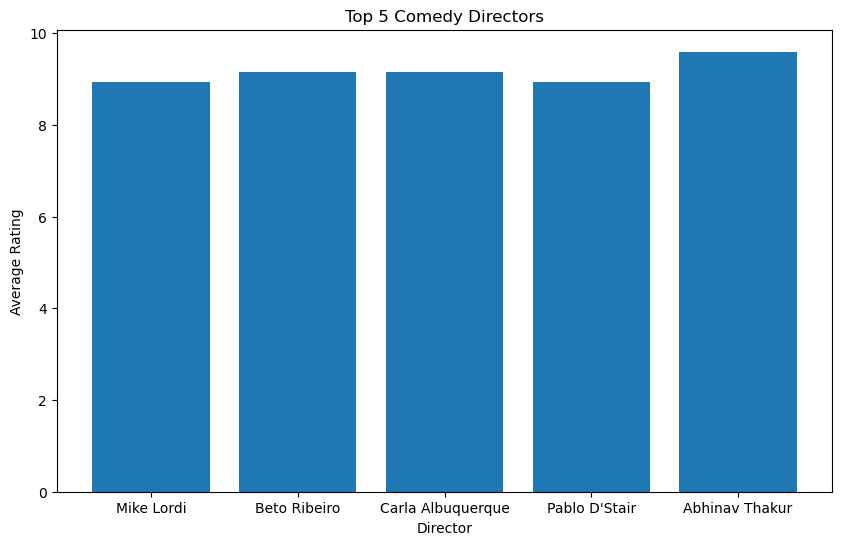

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.available
x = top_comdirectors['primary_name']
y = top_comdirectors['averagerating_avg']
director_count, ax = plt.subplots(figsize=(10, 6))
ax.bar(x,y)
abar_chart_title = ax.set_title('Top 5 Comedy Directors')
bar_chart_count_label = ax.set_ylabel('Average Rating')
bar_chart_series_label = ax.set_xlabel('Director')

In [31]:
cd = top_comdirectors.loc[top_comdirectors['averagerating'] > 8.0]
cd

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,averagerating_avg
748,tt2202391,5,nm3566441,director,None,None,Mike Lordi,1977.0,NaN,"producer,director,writer",Big Weekend,Big Weekend,2011,80.0,Comedy,9.1,7,8.95
2046,tt2217876,5,nm3566441,director,None,None,Mike Lordi,1977.0,NaN,"producer,director,writer",Love in a Coffee Shop,Love in a Coffee Shop,2013,98.0,Comedy,8.8,6,8.95
722,tt6819028,6,nm7664327,director,None,None,Beto Ribeiro,1973.0,NaN,"writer,producer,director",Filme B - O Vampiro da Paulista,Filme B - O Vampiro da Paulista,2017,70.0,Comedy,9.2,46,9.15
931,tt6819138,6,nm7664327,director,None,None,Beto Ribeiro,1973.0,NaN,"writer,producer,director",Filme B - A Van Assassina,Filme B - A Van Assassina,2017,85.0,Comedy,9.1,47,9.15
721,tt6819028,5,nm3266312,director,None,None,Carla Albuquerque,1969.0,NaN,"producer,director,art_director",Filme B - O Vampiro da Paulista,Filme B - O Vampiro da Paulista,2017,70.0,Comedy,9.2,46,9.15
930,tt6819138,5,nm3266312,director,None,None,Carla Albuquerque,1969.0,NaN,"producer,director,art_director",Filme B - A Van Assassina,Filme B - A Van Assassina,2017,85.0,Comedy,9.1,47,9.15
622,tt4659674,5,nm6143077,director,None,None,Pablo D'Stair,NaN,NaN,"writer,director,producer",Mississippy Missippi Tu-Polo,Mississippy Missippi Tu-Polo,2015,86.0,Comedy,9.2,5,8.95
2961,tt6737956,3,nm6143077,director,None,None,Pablo D'Stair,NaN,NaN,"writer,director,producer",Mr Pickpocket,Mr Pickpocket,2017,55.0,Comedy,8.7,6,8.95
58,tt9680166,5,nm10436203,director,None,None,Abhinav Thakur,NaN,NaN,director,Yeh Suhaagraat Impossible,Yeh Suhaagraat Impossible,2019,92.0,Comedy,9.6,624,9.60


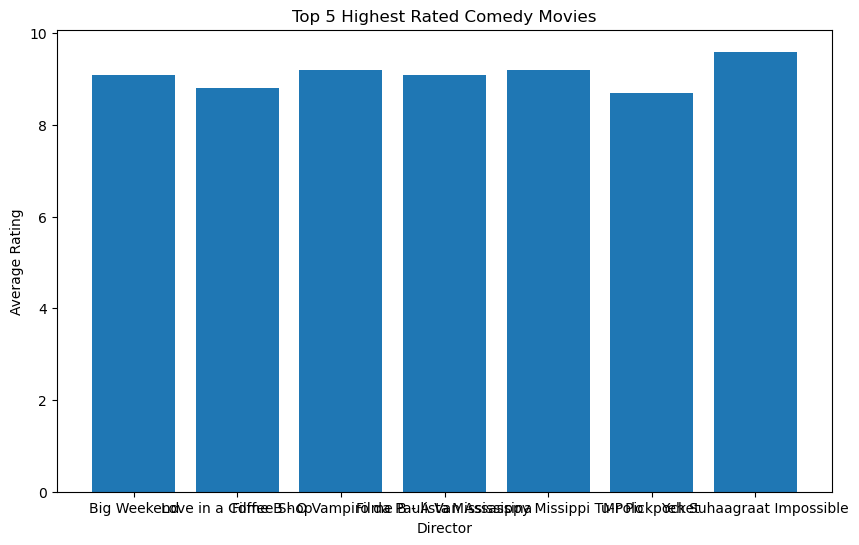

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.available
x = cd['primary_title']
y = cd['averagerating']
director_count, ax = plt.subplots(figsize=(10, 6))
ax.bar(x,y)
abar_chart_title = ax.set_title('Top 5 Highest Rated Comedy Movies')
bar_chart_count_label = ax.set_ylabel('Average Rating')
bar_chart_series_label = ax.set_xlabel('Director')

## Action Directors

In [33]:
action = '''
SELECT *
FROM principals
JOIN persons
    USING(person_id)
JOIN movie_basics
    USING(movie_id)
JOIN movie_ratings
    USING(movie_id)
WHERE category == "director" 
ORDER BY averagerating DESC
'''
action = pd.read_sql(action,conn)
action
action = action.loc[(action['genres']== 'Action') |(action['genres']== 'Action,Crime,Drama') | (action['genres']== 'Action,Drama')]
action = action.loc[action['averagerating']> 8.0]
action

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
22,tt10404502,4,nm4092456,director,None,None,Motoki Tanaka,NaN,NaN,"director,art_department,animation_department",Grisaia: Phantom trigger the animation 02. Sou...,Grisaia: Phantom trigger the animation 02. Sou...,2019,54.0,Action,9.8,5
57,tt9760512,5,nm10466690,director,None,None,Shankar,NaN,NaN,director,D/O Parvathamma,D/O Parvathamma,2019,NaN,Action,9.6,427
366,tt1729517,5,nm4093903,director,None,None,Joel David Santner,NaN,NaN,"writer,director,producer",Bare Knuckle,Bare Knuckle,2014,70.0,"Action,Drama",9.2,13
601,tt4901222,5,nm7487667,director,None,None,Naresh s Garg,NaN,NaN,"editor,director",Patta Patta Singhan Da Vairi,Patta Patta Singhan Da Vairi,2015,NaN,Action,9.2,12
699,tt8151734,2,nm4254419,director,None,None,Nabwana I.G.G.,NaN,NaN,"writer,director,cinematographer",Tebaatusasula,Tebaatusasula,2010,NaN,Action,9.2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8247,tt5458088,5,nm1056059,director,None,None,Rajeev Ravi,NaN,NaN,"cinematographer,director,writer",Kammatti Paadam,Kammatti Paadam,2016,177.0,"Action,Drama",8.1,2908
8295,tt6503672,5,nm2270901,director,None,None,Krishto D. Alam,1976.0,NaN,"producer,editor,director",Pertaruhan,Pertaruhan,2017,NaN,Action,8.1,60
8340,tt6019738,5,nm8246785,director,None,None,Xinyi Liu,NaN,NaN,"director,producer,writer",The Lethal Weapon,The Lethal Weapon,2014,85.0,"Action,Drama",8.1,9
8522,tt7939266,5,nm9575606,director,None,None,Damon Penn Jr.,NaN,NaN,"director,writer,cinematographer",Mountebank,Mountebank,2018,51.0,"Action,Crime,Drama",8.1,10


In [34]:
action['primary_name'].value_counts().head(20)

Nabwana I.G.G.               4
S.S. Rajamouli               2
Motoki Tanaka                1
Kester Nsirim                1
Salvo Grasso                 1
Radha Krishna Jagarlamudi    1
Kenneth Barr                 1
Juan Shamsul Alam            1
Jeremy Cropf                 1
Ika Santamaria               1
Prashanth Neel               1
Esses Tamás                  1
Joshua Sheik                 1
Narthan                      1
Suni                         1
Majdi Smiri                  1
Evan Pride                   1
Tate Becherer                1
German Gruber Jr.            1
David Sousa Moreau           1
Name: primary_name, dtype: int64

In [35]:
action_nab = action.loc[action['primary_name']== 'Nabwana I.G.G.']
action_nab['averagerating_avg'] = action_nab['averagerating'].sum()/len(action_nab['averagerating'])
action_ss = action.loc[action['primary_name']== 'S.S. Rajamouli']
action_ss['averagerating_avg'] = action_ss['averagerating'].sum()/len(action_ss['averagerating'])
action_car = action.loc[action['primary_name']== 'Shankar']
action_car['averagerating_avg'] = action_car['averagerating'].sum()/len(action_car['averagerating'])
action_san = action.loc[action['primary_name']== 'Joel David Santner']
action_san['averagerating_avg'] = action_san['averagerating'].sum()/len(action_san['averagerating'])
action_bri = action.loc[action['primary_name']== 'Naresh s Garg']
action_bri['averagerating_avg'] = action_bri['averagerating'].sum()/len(action_bri['averagerating'])

frames = [action_nab,action_ss,action_car,action_san,action_bri]
top_actdirectors = pd.concat(frames)
top_actdirectors

/var/folders/bm/m4lrvb8117nc1ks_2lybh8hc0000gn/T/ipykernel_827/2467884228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_nab['averagerating_avg'] = action_nab['averagerating'].sum()/len(action_nab['averagerating'])
/var/folders/bm/m4lrvb8117nc1ks_2lybh8hc0000gn/T/ipykernel_827/2467884228.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action_ss['averagerating_avg'] = action_ss['averagerating'].sum()/len(action_ss['averagerating'])
/var/folders/bm/m4lrvb8117nc1ks_2lybh8hc0000gn/T/ipykernel_82

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,averagerating_avg
699,tt8151734,2,nm4254419,director,None,None,Nabwana I.G.G.,NaN,NaN,"writer,director,cinematographer",Tebaatusasula,Tebaatusasula,2010,NaN,Action,9.2,12,8.65
2715,tt2342275,5,nm4254419,director,None,None,Nabwana I.G.G.,NaN,NaN,"writer,director,cinematographer",Rescue Team,Rescue Team,2011,91.0,Action,8.7,60,8.65
3972,tt2379727,5,nm4254419,director,None,None,Nabwana I.G.G.,NaN,NaN,"writer,director,cinematographer",Bukunja Tekunja Mitti: The Cannibals,Bukunja Tekunja Mitti: The Cannibals,2012,NaN,Action,8.5,34,8.65
6749,tt2358919,5,nm4254419,director,None,None,Nabwana I.G.G.,NaN,NaN,"writer,director,cinematographer",Black,Black,2012,NaN,Action,8.2,28,8.65
6170,tt4849438,5,nm1442514,director,None,None,S.S. Rajamouli,NaN,NaN,"writer,producer,director",Baahubali 2: The Conclusion,Baahubali 2: The Conclusion,2017,167.0,"Action,Drama",8.3,65656,8.20
8020,tt2631186,5,nm1442514,director,None,None,S.S. Rajamouli,NaN,NaN,"writer,producer,director",Baahubali: The Beginning,Bahubali: The Beginning,2015,159.0,"Action,Drama",8.1,93243,8.20
57,tt9760512,5,nm10466690,director,None,None,Shankar,NaN,NaN,director,D/O Parvathamma,D/O Parvathamma,2019,NaN,Action,9.6,427,9.60
366,tt1729517,5,nm4093903,director,None,None,Joel David Santner,NaN,NaN,"writer,director,producer",Bare Knuckle,Bare Knuckle,2014,70.0,"Action,Drama",9.2,13,9.20
601,tt4901222,5,nm7487667,director,None,None,Naresh s Garg,NaN,NaN,"editor,director",Patta Patta Singhan Da Vairi,Patta Patta Singhan Da Vairi,2015,NaN,Action,9.2,12,9.20


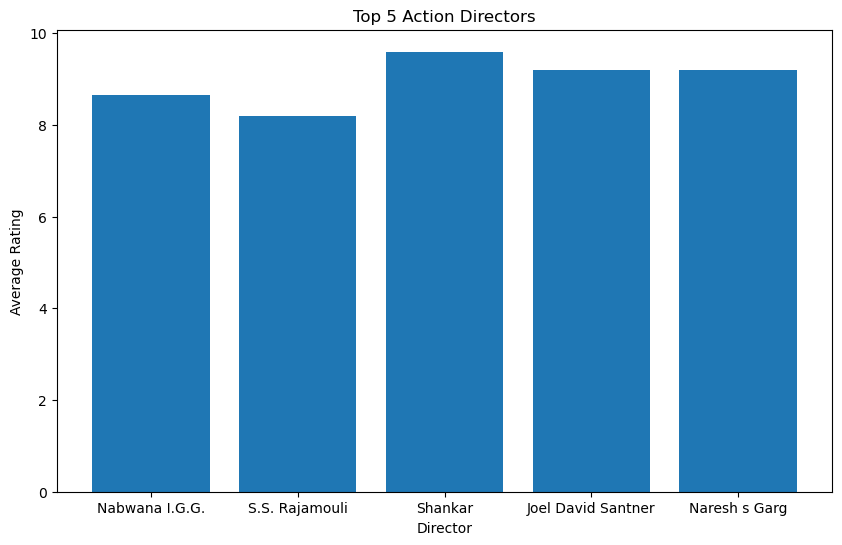

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.available
x = top_actdirectors['primary_name']
y = top_actdirectors['averagerating_avg']
director_count, ax = plt.subplots(figsize=(10, 6))
ax.bar(x,y)
abar_chart_title = ax.set_title('Top 5 Action Directors')
bar_chart_count_label = ax.set_ylabel('Average Rating')
bar_chart_series_label = ax.set_xlabel('Director')

In [74]:
ad = top_actdirectors.loc[top_actdirectors['averagerating'] > 8.5]
ad

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,averagerating_avg
699,tt8151734,2,nm4254419,director,None,None,Nabwana I.G.G.,NaN,NaN,"writer,director,cinematographer",Tebaatusasula,Tebaatusasula,2010,NaN,Action,9.2,12,8.65
2715,tt2342275,5,nm4254419,director,None,None,Nabwana I.G.G.,NaN,NaN,"writer,director,cinematographer",Rescue Team,Rescue Team,2011,91.0,Action,8.7,60,8.65
57,tt9760512,5,nm10466690,director,None,None,Shankar,NaN,NaN,director,D/O Parvathamma,D/O Parvathamma,2019,NaN,Action,9.6,427,9.60
366,tt1729517,5,nm4093903,director,None,None,Joel David Santner,NaN,NaN,"writer,director,producer",Bare Knuckle,Bare Knuckle,2014,70.0,"Action,Drama",9.2,13,9.20
601,tt4901222,5,nm7487667,director,None,None,Naresh s Garg,NaN,NaN,"editor,director",Patta Patta Singhan Da Vairi,Patta Patta Singhan Da Vairi,2015,NaN,Action,9.2,12,9.20


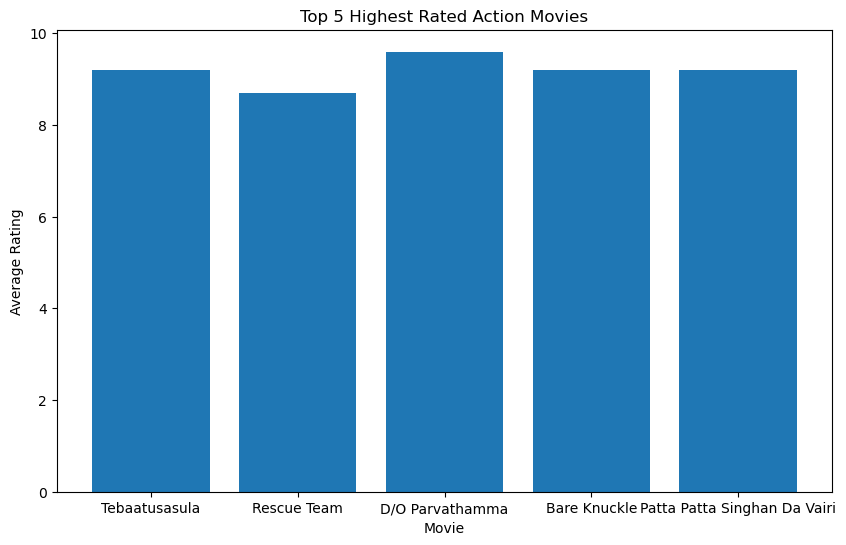

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.available
x = ad['primary_title']
y = ad['averagerating']
director_count, ax = plt.subplots(figsize=(10, 6))
ax.bar(x,y)
abar_chart_title = ax.set_title('Top 5 Highest Rated Action Movies')
bar_chart_count_label = ax.set_ylabel('Average Rating')
bar_chart_series_label = ax.set_xlabel('Movie')

## Top Thriller Directors

In [39]:
thrill = '''
SELECT *
FROM principals
JOIN persons
    USING(person_id)
JOIN movie_basics
    USING(movie_id)
JOIN movie_ratings
    USING(movie_id)
WHERE category == "director" 
ORDER BY averagerating DESC
'''
thrill = pd.read_sql(thrill,conn)
thrill
thrill = thrill.loc[(thrill['genres']== 'Thriller') |(thrill['genres']== 'Horror,Thriller') | (thrill['genres']== 'Drama,Thriller') |(thrill['genres']== 'Crime,Drama,Thriller') ]
thrill = thrill.loc[thrill['averagerating']> 8.0]
thrill

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
196,tt9390200,4,nm4891543,director,None,None,Shivkumar Parthasarathy,NaN,NaN,"miscellaneous,assistant_director,director",Dokyala Shot,Dokyala Shot,2019,122.0,Thriller,9.4,816
1867,tt8160864,5,nm2751807,director,None,None,Michael Matteo Rossi,1987.0,NaN,"producer,writer,director",Chase,Chase,2019,84.0,Thriller,8.9,1656
1873,tt8907970,5,nm10079200,director,None,None,Gvr Vasu,NaN,NaN,director,Kavacha,Kavacha,2019,160.0,Thriller,8.9,517
2216,tt3417422,5,nm2572228,director,None,None,Jeethu Joseph,NaN,NaN,"writer,director,producer",Drishyam,Drishyam,2013,160.0,"Crime,Drama,Thriller",8.8,24326
2282,tt4869678,5,nm7464139,director,None,None,Sushanth Reddy,NaN,NaN,"director,producer,actor",Superstar Kidnap,Superstar Kidnap,2015,120.0,Thriller,8.8,602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8443,tt7741602,5,nm7798954,director,None,None,Tariq Alkazim,NaN,NaN,"writer,director,producer",Until Midnight,Until Midnight,2018,78.0,"Drama,Thriller",8.1,675
8473,tt7222976,5,nm5756213,director,None,None,Suni,NaN,NaN,"writer,director,producer",Operation Alamelamma,Operation Alamelamma,2017,138.0,Thriller,8.1,427
8511,tt7798984,5,nm8631698,director,None,None,Saurabh Sinha,NaN,NaN,"director,writer,producer",Saavat: A Hunt for Closure,Saavat: A Hunt for Closure,2019,117.0,"Crime,Drama,Thriller",8.1,15
8570,tt9899860,5,nm10531298,director,None,None,Reza Zehtabchian,NaN,NaN,"director,writer",Watching This Movie Is a Crime,Didan in film jorm ast,2019,100.0,"Drama,Thriller",8.1,7


In [40]:
thrill['primary_name'].value_counts().head(20)

Larry Rosen                4
Jeethu Joseph              2
Graham Streeter            2
Shivkumar Parthasarathy    1
Paul Aspuria               1
Mollie Fitzgerald          1
Chase Dudley               1
Srijit Mukherji            1
Nathan Catucci             1
Brad Castillo              1
Alexander Cicak            1
René Bjerregaard           1
Matthew Mark Hunter        1
Lenny Abrahamson           1
Aniruddha Roy Chowdhury    1
Hemanth M. Rao             1
Michele Rocchi             1
Zack Wilcox                1
Sasa Hajdukovic            1
Dayal Padmanabhan          1
Name: primary_name, dtype: int64

In [41]:
thrill_ro = thrill.loc[thrill['primary_name']== 'Larry Rosen']
thrill_ro['averagerating_avg'] = thrill_ro['averagerating'].sum()/len(thrill_ro['averagerating'])
thrill_je = thrill.loc[thrill['primary_name']== 'Jeethu Joseph']
thrill_je['averagerating_avg'] = thrill_je['averagerating'].sum()/len(thrill_je['averagerating'])
thrill_gr = thrill.loc[thrill['primary_name']== 'Graham Streeter']
thrill_gr['averagerating_avg'] = thrill_gr['averagerating'].sum()/len(thrill_gr['averagerating'])
thrill_pa = thrill.loc[thrill['primary_name']== 'Shivkumar Parthasarathy']
thrill_pa['averagerating_avg'] = thrill_pa['averagerating'].sum()/len(thrill_pa['averagerating'])
thrill_as = thrill.loc[thrill['primary_name']== 'Paul Aspuria']
thrill_as['averagerating_avg'] = thrill_as['averagerating'].sum()/len(thrill_as['averagerating'])

frames = [thrill_ro,thrill_je,thrill_gr,thrill_pa,thrill_as]
top_thrilldirectors = pd.concat(frames)
top_thrilldirectors

/var/folders/bm/m4lrvb8117nc1ks_2lybh8hc0000gn/T/ipykernel_827/3875544502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thrill_ro['averagerating_avg'] = thrill_ro['averagerating'].sum()/len(thrill_ro['averagerating'])
/var/folders/bm/m4lrvb8117nc1ks_2lybh8hc0000gn/T/ipykernel_827/3875544502.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thrill_je['averagerating_avg'] = thrill_je['averagerating'].sum()/len(thrill_je['averagerating'])
/var/folders/bm/m4lrvb8117nc1ks_2lybh8hc0000gn/T/ipykernel_827/3

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,averagerating_avg
3491,tt5375258,5,nm3583561,director,None,None,Larry Rosen,NaN,NaN,"producer,director,writer",The New Roommate,The New Roommate,2017,80.0,"Drama,Thriller",8.6,36,8.325
5689,tt2427962,5,nm3583561,director,None,None,Larry Rosen,NaN,NaN,"producer,director,writer",The Worst Thing,The Worst Thing,2012,NaN,"Drama,Thriller",8.3,12,8.325
5986,tt4973502,3,nm3583561,director,None,None,Larry Rosen,NaN,NaN,"producer,director,writer",Anywhere But Here,Anywhere But Here,2016,NaN,"Drama,Thriller",8.3,15,8.325
8387,tt4514674,4,nm3583561,director,None,None,Larry Rosen,NaN,NaN,"producer,director,writer",Behind Every Door,Behind Every Door,2015,NaN,Thriller,8.1,9,8.325
2216,tt3417422,5,nm2572228,director,None,None,Jeethu Joseph,NaN,NaN,"writer,director,producer",Drishyam,Drishyam,2013,160.0,"Crime,Drama,Thriller",8.8,24326,8.600
4976,tt4429128,5,nm2572228,director,None,None,Jeethu Joseph,NaN,NaN,"writer,director,producer",Papanasam,Papanasam,2015,179.0,"Drama,Thriller",8.4,4676,8.600
4410,tt6772188,5,nm1729222,director,None,None,Graham Streeter,NaN,NaN,"director,writer,cinematographer",I May Regret,I May Regret,2018,100.0,Thriller,8.5,39,8.400
5876,tt4036336,5,nm1729222,director,None,None,Graham Streeter,NaN,NaN,"director,writer,cinematographer",Imperfect Sky,Imperfect Sky,2015,115.0,"Drama,Thriller",8.3,41,8.400
196,tt9390200,4,nm4891543,director,None,None,Shivkumar Parthasarathy,NaN,NaN,"miscellaneous,assistant_director,director",Dokyala Shot,Dokyala Shot,2019,122.0,Thriller,9.4,816,9.400
7135,tt4546600,5,nm2196996,director,None,None,Paul Aspuria,NaN,NaN,"director,editor,producer",Heading Down South,Heading Down South,2019,89.0,"Drama,Thriller",8.2,5,8.200


## Scatterplot for Thrillers

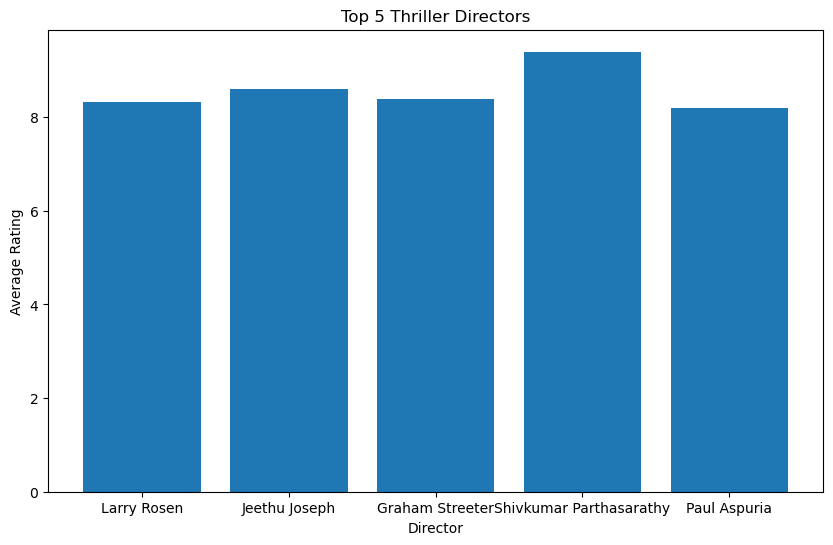

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.available
x = top_thrilldirectors['primary_name']
y = top_thrilldirectors['averagerating_avg']
director_count, ax = plt.subplots(figsize=(10, 6))
ax.bar(x,y)
abar_chart_title = ax.set_title('Top 5 Thriller Directors')
bar_chart_count_label = ax.set_ylabel('Average Rating')
bar_chart_series_label = ax.set_xlabel('Director')

In [43]:
td = top_thrilldirectors.loc[top_thrilldirectors['averagerating'] > 8.3]
td

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,averagerating_avg
3491,tt5375258,5,nm3583561,director,None,None,Larry Rosen,NaN,NaN,"producer,director,writer",The New Roommate,The New Roommate,2017,80.0,"Drama,Thriller",8.6,36,8.325
2216,tt3417422,5,nm2572228,director,None,None,Jeethu Joseph,NaN,NaN,"writer,director,producer",Drishyam,Drishyam,2013,160.0,"Crime,Drama,Thriller",8.8,24326,8.600
4976,tt4429128,5,nm2572228,director,None,None,Jeethu Joseph,NaN,NaN,"writer,director,producer",Papanasam,Papanasam,2015,179.0,"Drama,Thriller",8.4,4676,8.600
4410,tt6772188,5,nm1729222,director,None,None,Graham Streeter,NaN,NaN,"director,writer,cinematographer",I May Regret,I May Regret,2018,100.0,Thriller,8.5,39,8.400
196,tt9390200,4,nm4891543,director,None,None,Shivkumar Parthasarathy,NaN,NaN,"miscellaneous,assistant_director,director",Dokyala Shot,Dokyala Shot,2019,122.0,Thriller,9.4,816,9.400


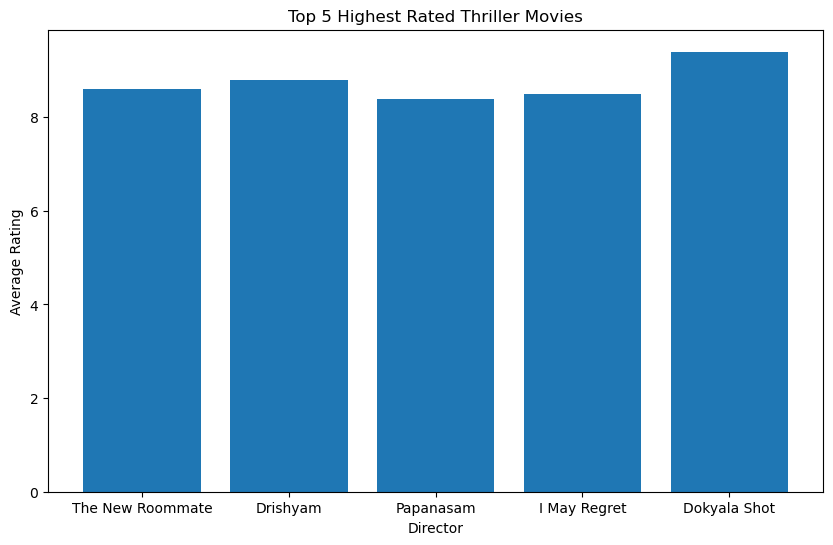

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.available
x = td['primary_title']
y = td['averagerating']
director_count, ax = plt.subplots(figsize=(10, 6))
ax.bar(x,y)
abar_chart_title = ax.set_title('Top 5 Highest Rated Thriller Movies')
bar_chart_count_label = ax.set_ylabel('Average Rating')
bar_chart_series_label = ax.set_xlabel('Director')

## Documentary Directors

In [45]:
doc = '''
SELECT *
FROM principals
JOIN persons
    USING(person_id)
JOIN movie_basics
    USING(movie_id)
JOIN movie_ratings
    USING(movie_id)
WHERE category == "director" 
ORDER BY averagerating DESC
'''
doc = pd.read_sql(doc,conn)
doc
doc = doc.loc[(doc['genres']== 'Documentary') |(doc['genres']== 'Biography,Documentary') | (doc['genres']== 'Documentary,Drama') |(doc['genres']== 'Documentary,Music')
|(doc['genres']== 'Biography,Documentary,History')|(doc['genres']== 'Documentary,History')]
doc = doc.loc[doc['averagerating']> 9.0]
doc

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt10176328,1,nm10616933,director,None,None,Ivana Diniz,NaN,NaN,"director,writer",Exteriores: Mulheres Brasileiras na Diplomacia,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52.0,Documentary,10.0,5
2,tt2632430,1,nm0880350,director,None,None,Mohamed Ulad-Mohand,NaN,NaN,"producer,director,writer",Hercule contre Hermès,Hercule contre Hermès,2012,72.0,Documentary,10.0,5
3,tt4109192,3,nm3656924,director,None,None,Soudabeh Moradian,1972.0,NaN,"director,editor,producer",I Was Born Yesterday!,I Was Born Yesterday!,2015,31.0,Documentary,10.0,6
5,tt5089804,1,nm7633303,director,None,None,Lindsay Thompson,NaN,NaN,"cinematographer,director,actress",Fly High: Story of the Disc Dog,Fly High: Story of the Disc Dog,2019,65.0,Documentary,10.0,7
6,tt5344358,5,nm6925060,director,None,None,Tristan David Luciotti,NaN,NaN,"actor,writer,producer",All Around Us,All Around Us,2019,NaN,Documentary,10.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,tt8480368,4,nm7387053,director,None,None,Tom Long,NaN,NaN,"director,cinematographer,producer",Heroes of the Empire,Heroes of the Empire,2018,60.0,Documentary,9.1,10
1022,tt6896442,5,nm8996806,director,None,None,Stanislav Golovin,NaN,NaN,director,Uechi Ryu: The Master's Edition,Uechi Ryu: The Master's Edition,2015,55.0,Documentary,9.1,8
1024,tt8937100,2,nm2061831,director,None,None,Loïc Porcher,NaN,NaN,"producer,writer,director","Higgi, Inspiring Voices","Higgi, Inspiring Voices",2018,93.0,Documentary,9.1,9
1025,tt8937100,3,nm2064521,director,None,None,Philippe Reypens,NaN,NaN,"producer,director,writer","Higgi, Inspiring Voices","Higgi, Inspiring Voices",2018,93.0,Documentary,9.1,9


In [46]:
doc['primary_name'].value_counts().head(20)

Tom Logan            3
Francois Lespes      2
Steve Ravic          2
Georges Chamchoum    2
Mike Erickson        2
Neven Hitrec         2
Javier Pistani       2
Hamid Benamra        2
Cyrus T. Hayley      1
Tomislav Zaja        1
Alex J.R. Nielsen    1
Carles Prats         1
Doug Orchard         1
David Freid          1
Fini Maza            1
Thomas Hartmann      1
Zheng Zhou           1
Perry de Ruijter     1
Carlos Agulló        1
Georg Joutras        1
Name: primary_name, dtype: int64

In [47]:
doc_lo = doc.loc[doc['primary_name']== 'Tom Logan']
doc_lo['averagerating_avg'] = doc_lo['averagerating'].sum()/len(doc_lo['averagerating'])
doc_le = doc.loc[doc['primary_name']== 'Francois Lespes']
doc_le['averagerating_avg'] = doc_le['averagerating'].sum()/len(doc_le['averagerating'])
doc_ra = doc.loc[doc['primary_name']== 'Steve Ravic']
doc_ra['averagerating_avg'] = doc_ra['averagerating'].sum()/len(doc_ra['averagerating'])
doc_ge = doc.loc[doc['primary_name']== 'Georges Chamchoum']
doc_ge['averagerating_avg'] = doc_ge['averagerating'].sum()/len(doc_ge['averagerating'])
doc_on = doc.loc[doc['primary_name']== 'Mike Erickson']
doc_on['averagerating_avg'] = doc_on['averagerating'].sum()/len(doc_on['averagerating'])

frames = [doc_lo,doc_le,doc_ra,doc_ge,doc_on]
top_docdirectors = pd.concat(frames)
top_docdirectors

/var/folders/bm/m4lrvb8117nc1ks_2lybh8hc0000gn/T/ipykernel_827/2229044192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doc_lo['averagerating_avg'] = doc_lo['averagerating'].sum()/len(doc_lo['averagerating'])
/var/folders/bm/m4lrvb8117nc1ks_2lybh8hc0000gn/T/ipykernel_827/2229044192.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doc_le['averagerating_avg'] = doc_le['averagerating'].sum()/len(doc_le['averagerating'])
/var/folders/bm/m4lrvb8117nc1ks_2lybh8hc0000gn/T/ipykernel_827/2229044192.py:6: Se

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,averagerating_avg
96,tt2175959,2,nm0517665,director,None,None,Tom Logan,1953.0,NaN,"director,producer,writer",The Million Dollar Minute,The Million Dollar Minute,2012,90.0,Documentary,9.4,79,9.266667
258,tt2186681,2,nm0517665,director,None,None,Tom Logan,1953.0,NaN,"director,producer,writer",Acting and Eating at the Same Time,Acting and Eating at the Same Time,2011,100.0,Documentary,9.3,75,9.266667
768,tt2342065,2,nm0517665,director,None,None,Tom Logan,1953.0,NaN,"director,producer,writer",Director Featurette of 'The Million Dollar Min...,Director Featurette of 'The Million Dollar Min...,2012,47.0,"Documentary,History",9.1,67,9.266667
408,tt2035547,1,nm4583120,director,None,None,Francois Lespes,NaN,NaN,"director,cinematographer,writer",La cabane du Bon Dieu,La cabane du Bon Dieu,2011,54.0,Documentary,9.2,12,9.150000
818,tt2537428,1,nm4583120,director,None,None,Francois Lespes,NaN,NaN,"director,cinematographer,writer","Valaam, l'archipel des moines","Valaam, l'archipel des moines",2012,54.0,Documentary,9.1,14,9.150000
269,tt4097786,4,nm2223858,director,None,None,Steve Ravic,NaN,NaN,"producer,director,writer","How I Once Made a Movie for $2,000 Part 1","How I Once Made a Movie for $2,000 Part 1",2014,NaN,Documentary,9.3,9,9.250000
448,tt2869878,5,nm2223858,director,None,None,Steve Ravic,NaN,NaN,"producer,director,writer",The Poodles: In the Flesh,The Poodles: In the Flesh,2010,152.0,Documentary,9.2,1172,9.250000
375,tt2215187,3,nm0150503,director,None,None,Georges Chamchoum,1946.0,NaN,"producer,director,writer",Journey into my Faith,Journey into my Faith,2012,84.0,Documentary,9.2,68,9.200000
512,tt3381438,1,nm0150503,director,None,None,Georges Chamchoum,1946.0,NaN,"producer,director,writer",Ninety!,Ninety!,2013,63.0,Documentary,9.2,11,9.200000
590,tt6739542,5,nm1191763,director,None,None,Mike Erickson,NaN,NaN,"actor,director,producer",Behavioral Concept,Behavioral Concept,2015,57.0,Documentary,9.2,56,9.150000


## Documentary Scatterplot

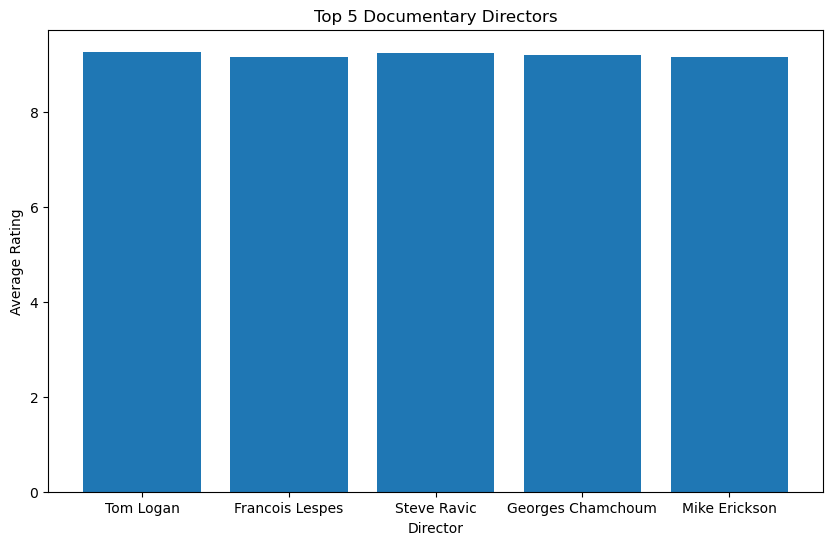

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.available
x = top_docdirectors['primary_name']
y = top_docdirectors['averagerating_avg']
director_count, ax = plt.subplots(figsize=(10, 6))
ax.bar(x,y)
abar_chart_title = ax.set_title('Top 5 Documentary Directors')
bar_chart_count_label = ax.set_ylabel('Average Rating')
bar_chart_series_label = ax.set_xlabel('Director')

In [49]:
dd = top_docdirectors.loc[top_docdirectors['averagerating'] > 9.19]
dd

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,averagerating_avg
96,tt2175959,2,nm0517665,director,None,None,Tom Logan,1953.0,NaN,"director,producer,writer",The Million Dollar Minute,The Million Dollar Minute,2012,90.0,Documentary,9.4,79,9.266667
258,tt2186681,2,nm0517665,director,None,None,Tom Logan,1953.0,NaN,"director,producer,writer",Acting and Eating at the Same Time,Acting and Eating at the Same Time,2011,100.0,Documentary,9.3,75,9.266667
408,tt2035547,1,nm4583120,director,None,None,Francois Lespes,NaN,NaN,"director,cinematographer,writer",La cabane du Bon Dieu,La cabane du Bon Dieu,2011,54.0,Documentary,9.2,12,9.150000
269,tt4097786,4,nm2223858,director,None,None,Steve Ravic,NaN,NaN,"producer,director,writer","How I Once Made a Movie for $2,000 Part 1","How I Once Made a Movie for $2,000 Part 1",2014,NaN,Documentary,9.3,9,9.250000
448,tt2869878,5,nm2223858,director,None,None,Steve Ravic,NaN,NaN,"producer,director,writer",The Poodles: In the Flesh,The Poodles: In the Flesh,2010,152.0,Documentary,9.2,1172,9.250000
375,tt2215187,3,nm0150503,director,None,None,Georges Chamchoum,1946.0,NaN,"producer,director,writer",Journey into my Faith,Journey into my Faith,2012,84.0,Documentary,9.2,68,9.200000
512,tt3381438,1,nm0150503,director,None,None,Georges Chamchoum,1946.0,NaN,"producer,director,writer",Ninety!,Ninety!,2013,63.0,Documentary,9.2,11,9.200000
590,tt6739542,5,nm1191763,director,None,None,Mike Erickson,NaN,NaN,"actor,director,producer",Behavioral Concept,Behavioral Concept,2015,57.0,Documentary,9.2,56,9.150000


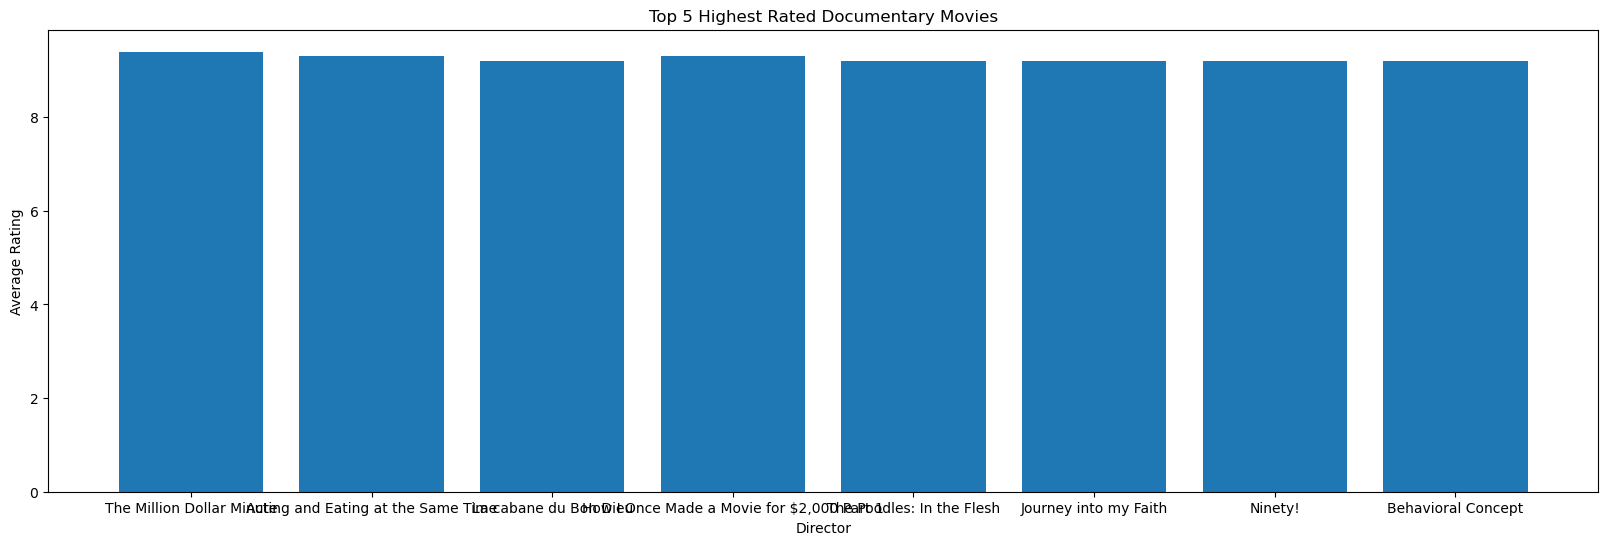

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.available
x = dd['primary_title']
y = dd['averagerating']
director_count, ax = plt.subplots(figsize=(20, 6))
ax.bar(x,y)
abar_chart_title = ax.set_title('Top 5 Highest Rated Documentary Movies')
bar_chart_count_label = ax.set_ylabel('Average Rating')
bar_chart_series_label = ax.set_xlabel('Director')

## Horror Directors

In [51]:
horror = '''
SELECT *
FROM principals
JOIN persons
    USING(person_id)
JOIN movie_basics
    USING(movie_id)
JOIN movie_ratings
    USING(movie_id)
WHERE category == "director" 
ORDER BY averagerating DESC
'''
horror = pd.read_sql(horror,conn)
horror
horror = horror.loc[horror['genres']== 'Horror']
horror = horror.loc[horror['averagerating']> 8.0]
horror

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
383,tt10115644,5,nm4191487,director,None,None,Eric Widing,NaN,NaN,"editor,producer,actor",Ragmork,Ragmork,2019,86.0,Horror,9.2,6
760,tt10368582,5,nm10710108,director,None,None,Pankaj Baalan,NaN,NaN,None,Chinnada Gombe,Chinnada Gombe,2018,110.0,Horror,9.1,40
1974,tt10280172,5,nm3127972,director,None,None,David Axe,NaN,NaN,"writer,producer,director",Shed,Shed,2019,82.0,Horror,8.8,8
2060,tt2246695,5,nm2185637,director,None,None,Emil Novak,NaN,NaN,"cinematographer,director,writer",Frankenstein's Patchwork Monster,Frankenstein's Patchwork Monster,2015,100.0,Horror,8.8,5
2344,tt6524704,5,nm5126909,director,None,None,Benjamin Rider,1992.0,NaN,"writer,cinematographer,producer",Here Be Dragons,Here Be Dragons,2018,70.0,Horror,8.8,8
2422,tt6872670,5,nm7324773,director,None,None,Neil Morris,NaN,NaN,"writer,producer,director",Dark Ditties Presents 'Mrs Wiltshire',Dark Ditties Presents 'Mrs Wiltshire',2018,67.0,Horror,8.8,10
2423,tt6872670,6,nm4563809,director,None,None,Gary Smart,1982.0,NaN,"writer,producer,director",Dark Ditties Presents 'Mrs Wiltshire',Dark Ditties Presents 'Mrs Wiltshire',2018,67.0,Horror,8.8,10
2428,tt4933418,5,nm6021959,director,None,None,Cosmotropia de Xam,NaN,NaN,"director,writer,editor",Inferno Veneziano,Inferno Veneziano,2015,NaN,Horror,8.8,6
3061,tt8016032,5,nm9628805,director,None,None,Junpei Tsuchida,NaN,NaN,"director,writer,miscellaneous",Chronicle of the After-School Wars,Hôkago senki,2018,115.0,Horror,8.7,35
3519,tt4186182,5,nm3431151,director,None,None,Rob Hawk,NaN,NaN,"cinematographer,director,editor",Take 2: The Audition,Take 2: The Audition,2015,110.0,Horror,8.6,45


In [52]:
horror['primary_name'].value_counts().head(20)

Larry Rosen            3
Cosmotropia de Xam     2
Eric Widing            1
Christopher Maggard    1
Paul M McAlarney       1
Eric Ruiz              1
Brian Naydol           1
Robert Doty            1
Bryan Martin           1
Jesse H. Knight        1
Roland Sanchez         1
Chris Hastings         1
Rachel Brogan          1
Rene Potter            1
Mihail Nicolae         1
Pang-Chun Chan         1
Michael H Royal        1
Jeremy Allen           1
H. Mucahit Pehlivan    1
Pankaj Baalan          1
Name: primary_name, dtype: int64

In [53]:
horror_lo = horror.loc[horror['primary_name']== 'Larry Rosen']
horror_lo['averagerating_avg'] = horror_lo['averagerating'].sum()/len(horror_lo['averagerating'])
horror_le = horror.loc[horror['primary_name']== 'Cosmotropia de Xam']
horror_le['averagerating_avg'] = horror_le['averagerating'].sum()/len(horror_le['averagerating'])
horror_ra = horror.loc[horror['primary_name']== 'Eric Widing']
horror_ra['averagerating_avg'] = horror_ra['averagerating'].sum()/len(horror_ra['averagerating'])
horror_ge = horror.loc[horror['primary_name']== 'Christopher Maggard']
horror_ge['averagerating_avg'] = horror_ge['averagerating'].sum()/len(horror_ge['averagerating'])
horror_on = horror.loc[horror['primary_name']== 'Paul M McAlarney']
horror_on['averagerating_avg'] = horror_on['averagerating'].sum()/len(horror_on['averagerating'])

frames = [horror_lo,horror_le,horror_ra,horror_ge,horror_on]
top_hordirectors = pd.concat(frames)
top_hordirectors

/var/folders/bm/m4lrvb8117nc1ks_2lybh8hc0000gn/T/ipykernel_827/1566620837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horror_lo['averagerating_avg'] = horror_lo['averagerating'].sum()/len(horror_lo['averagerating'])
/var/folders/bm/m4lrvb8117nc1ks_2lybh8hc0000gn/T/ipykernel_827/1566620837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horror_le['averagerating_avg'] = horror_le['averagerating'].sum()/len(horror_le['averagerating'])
/var/folders/bm/m4lrvb8117nc1ks_2lybh8hc0000gn/T/ipykernel_827/1

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,averagerating_avg
4086,tt3743392,5,nm3583561,director,None,None,Larry Rosen,NaN,NaN,"producer,director,writer",Arnold the Killer Clown,Arnold the Killer Clown,2015,NaN,Horror,8.5,44,8.40
4939,tt3400364,5,nm3583561,director,None,None,Larry Rosen,NaN,NaN,"producer,director,writer",Some Mistakes Are Forever,Some Mistakes Are Forever,2014,NaN,Horror,8.4,25,8.40
6088,tt4280756,5,nm3583561,director,None,None,Larry Rosen,NaN,NaN,"producer,director,writer",Blood Drops of Love,Blood Drops of Love,2014,NaN,Horror,8.3,23,8.40
2428,tt4933418,5,nm6021959,director,None,None,Cosmotropia de Xam,NaN,NaN,"director,writer,editor",Inferno Veneziano,Inferno Veneziano,2015,NaN,Horror,8.8,6,8.45
8212,tt5540058,5,nm6021959,director,None,None,Cosmotropia de Xam,NaN,NaN,"director,writer,editor",Succubus,Succubus,2016,NaN,Horror,8.1,9,8.45
383,tt10115644,5,nm4191487,director,None,None,Eric Widing,NaN,NaN,"editor,producer,actor",Ragmork,Ragmork,2019,86.0,Horror,9.2,6,9.20
7483,tt8348286,5,nm7556228,director,None,None,Christopher Maggard,NaN,NaN,"producer,director,writer",Rosa Leigh,Rosa Leigh,2018,NaN,Horror,8.2,13,8.20
6150,tt5372392,5,nm4889170,director,None,None,Paul M McAlarney,NaN,NaN,"director,actor,editor",The Streets Run Red,The Streets Run Red,2017,NaN,Horror,8.3,7,8.30


## Horror Movie Scatterplots

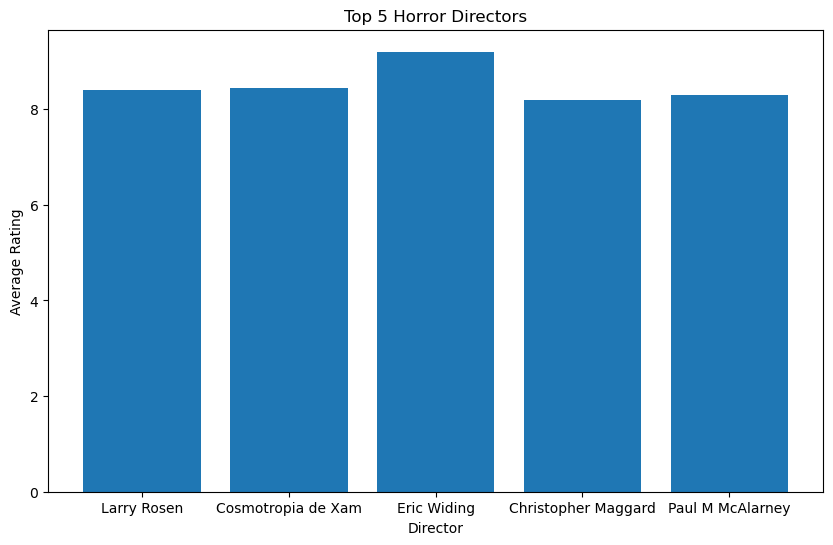

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.available
x = top_hordirectors['primary_name']
y = top_hordirectors['averagerating_avg']
director_count, ax = plt.subplots(figsize=(10, 6))
ax.bar(x,y)
abar_chart_title = ax.set_title('Top 5 Horror Directors')
bar_chart_count_label = ax.set_ylabel('Average Rating')
bar_chart_series_label = ax.set_xlabel('Director')

In [55]:
hd = top_hordirectors.loc[top_hordirectors['averagerating'] > 8.2]
hd

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,averagerating_avg
4086,tt3743392,5,nm3583561,director,None,None,Larry Rosen,NaN,NaN,"producer,director,writer",Arnold the Killer Clown,Arnold the Killer Clown,2015,NaN,Horror,8.5,44,8.40
4939,tt3400364,5,nm3583561,director,None,None,Larry Rosen,NaN,NaN,"producer,director,writer",Some Mistakes Are Forever,Some Mistakes Are Forever,2014,NaN,Horror,8.4,25,8.40
6088,tt4280756,5,nm3583561,director,None,None,Larry Rosen,NaN,NaN,"producer,director,writer",Blood Drops of Love,Blood Drops of Love,2014,NaN,Horror,8.3,23,8.40
2428,tt4933418,5,nm6021959,director,None,None,Cosmotropia de Xam,NaN,NaN,"director,writer,editor",Inferno Veneziano,Inferno Veneziano,2015,NaN,Horror,8.8,6,8.45
383,tt10115644,5,nm4191487,director,None,None,Eric Widing,NaN,NaN,"editor,producer,actor",Ragmork,Ragmork,2019,86.0,Horror,9.2,6,9.20
6150,tt5372392,5,nm4889170,director,None,None,Paul M McAlarney,NaN,NaN,"director,actor,editor",The Streets Run Red,The Streets Run Red,2017,NaN,Horror,8.3,7,8.30


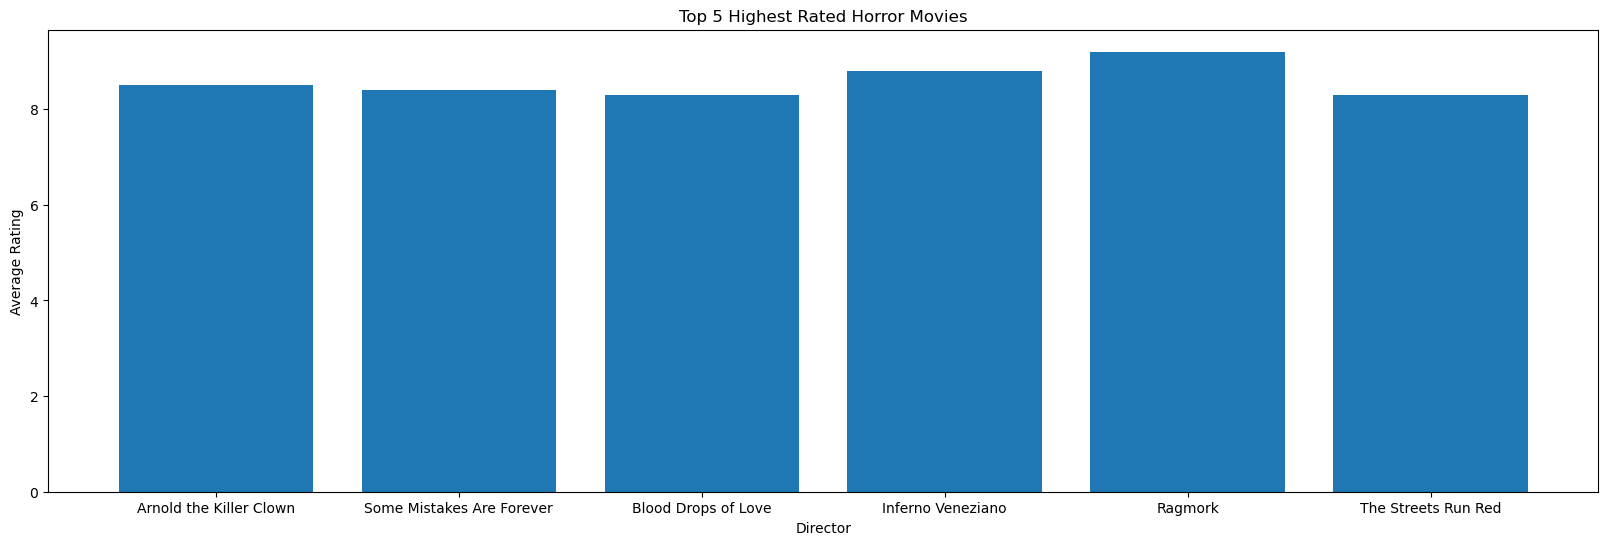

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.available
x = hd['primary_title']
y = hd['averagerating']
director_count, ax = plt.subplots(figsize=(20, 6))
ax.bar(x,y)
abar_chart_title = ax.set_title('Top 5 Highest Rated Horror Movies')
bar_chart_count_label = ax.set_ylabel('Average Rating')
bar_chart_series_label = ax.set_xlabel('Director')

## Top 5 Family Directors

In [57]:
Fam = '''
SELECT *
FROM principals
JOIN persons
    USING(person_id)
JOIN movie_basics
    USING(movie_id)
JOIN movie_ratings
    USING(movie_id)
WHERE category == "director" 
ORDER BY averagerating DESC
'''
Fam = pd.read_sql(Fam,conn)
Fam
Fam = Fam.loc[(Fam['genres']== 'Family') | (Fam['genres']== 'Drama,Family')]
Fam = Fam.loc[Fam['averagerating']> 8.0]
Fam

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
133,tt3861388,5,nm5171392,director,None,None,Judith R. Escalona,NaN,NaN,"writer,director,editor",Bx3M,Bx3M,2016,103.0,"Drama,Family",9.4,5
518,tt2662500,5,nm1898793,director,None,None,Kevin Tolbert,NaN,NaN,"producer,sound_department,director",Write Now,Write Now,2012,50.0,"Drama,Family",9.2,6
552,tt5314484,5,nm1247364,director,None,None,Dan Hewitt Owens,1947.0,NaN,"producer,director,actor",Project: Puppies for Christmas,Project: Puppies for Christmas,2019,93.0,Family,9.2,16
574,tt5311546,5,nm0542498,director,None,None,Mahesh Manjrekar,1953.0,NaN,"actor,writer,director",Natsamrat,Natsamrat,2016,166.0,"Drama,Family",9.2,4297
596,tt7121844,5,nm1473098,director,None,None,Curt Hahn,NaN,NaN,"producer,director,writer",MacDonald Ranch,MacDonald Ranch,2017,48.0,Family,9.2,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8415,tt5101976,5,nm4618719,director,None,None,Gazi Rakayet,NaN,NaN,"actor,writer,director",Mrittika Maya,Mrittika Maya,2013,138.0,"Drama,Family",8.1,43
8431,tt8066076,5,nm0729764,director,None,None,Riri Riza,1970.0,NaN,"director,writer,producer",Kulari ke Pantai,Kulari ke Pantai,2018,112.0,Family,8.1,153
8457,tt7885874,5,nm6457871,director,None,None,Yandy Laurens,NaN,NaN,"director,writer",Keluarga Cemara,Keluarga Cemara,2018,110.0,Family,8.1,313
8501,tt9070794,5,nm1659763,director,None,None,Shannon Flynn,NaN,NaN,"director,miscellaneous,editor",Holiday Spectacular,Holiday Spectacular,2018,48.0,Family,8.1,16


In [58]:
Fam['primary_name'].value_counts().head(20)

Elizabeth Blake-Thomas     3
Trisha Ray                 2
Judith R. Escalona         1
Thomas Weber               1
Abbas Raziji               1
Katina Sossiadis           1
Koula Sossiadis Kazista    1
Takato Hosoi               1
Nagraj Manjule             1
Catherine Corona           1
Kim Rocco Shields          1
Ganesh Nair                1
Ashwiny Iyer Tiwari        1
John Trengove              1
Sabyasachi Mohapatra       1
Malindi Fickle             1
Patrick Rea                1
Doc Benson                 1
Nandita Roy                1
Shiboprosad Mukherjee      1
Name: primary_name, dtype: int64

In [59]:
Fam_bl = Fam.loc[Fam['primary_name']== 'Elizabeth Blake-Thomas']
Fam_bl['averagerating_avg'] = Fam_bl['averagerating'].sum()/len(Fam_bl['averagerating'])
Fam_ra = Fam.loc[Fam['primary_name']== 'Trisha Ray']
Fam_ra['averagerating_avg'] = Fam_ra['averagerating'].sum()/len(Fam_ra['averagerating'])
Fam_es = Fam.loc[Fam['primary_name']== 'Judith R. Escalona']
Fam_es['averagerating_avg'] = Fam_es['averagerating'].sum()/len(Fam_es['averagerating'])
Fam_we = Fam.loc[Fam['primary_name']== 'Thomas Weber']
Fam_we['averagerating_avg'] = Fam_we['averagerating'].sum()/len(Fam_we['averagerating'])
Fam_ab = Fam.loc[Fam['primary_name']== 'Abbas Raziji']
Fam_ab['averagerating_avg'] = Fam_ab['averagerating'].sum()/len(Fam_ab['averagerating'])

frames = [Fam_bl,Fam_ra,Fam_es,Fam_we,Fam_ab]
top_famdirectors = pd.concat(frames)
top_famdirectors

/var/folders/bm/m4lrvb8117nc1ks_2lybh8hc0000gn/T/ipykernel_827/1942607770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fam_bl['averagerating_avg'] = Fam_bl['averagerating'].sum()/len(Fam_bl['averagerating'])
/var/folders/bm/m4lrvb8117nc1ks_2lybh8hc0000gn/T/ipykernel_827/1942607770.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fam_ra['averagerating_avg'] = Fam_ra['averagerating'].sum()/len(Fam_ra['averagerating'])
/var/folders/bm/m4lrvb8117nc1ks_2lybh8hc0000gn/T/ipykernel_827/1942607770.py:6: Se

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,averagerating_avg
632,tt7294234,5,nm6230910,director,None,None,Elizabeth Blake-Thomas,NaN,NaN,"producer,director,writer",Maybe I'm Fine,Maybe I'm Fine,2018,98.0,Family,9.2,39,8.9
1759,tt6226212,5,nm6230910,director,None,None,Elizabeth Blake-Thomas,NaN,NaN,"producer,director,writer",Sand Angels,Sand Angels,2018,71.0,Family,8.9,427,8.9
3487,tt6170432,5,nm6230910,director,None,None,Elizabeth Blake-Thomas,NaN,NaN,"producer,director,writer",The League of Legend Keepers: Shadows,The League of Legend Keepers: Shadows,2017,72.0,Family,8.6,410,8.9
814,tt3109222,5,nm2085641,director,None,None,Trisha Ray,NaN,NaN,"producer,editor,writer",Artisse,Artisse,2013,60.0,Family,9.1,11,8.6
7648,tt1402361,5,nm2085641,director,None,None,Trisha Ray,NaN,NaN,"producer,editor,writer",Sugar Baby,Sugar Baby,2011,113.0,Family,8.1,31,8.6
133,tt3861388,5,nm5171392,director,None,None,Judith R. Escalona,NaN,NaN,"writer,director,editor",Bx3M,Bx3M,2016,103.0,"Drama,Family",9.4,5,9.4
5201,tt5174898,5,nm0916767,director,None,None,Thomas Weber,NaN,NaN,"producer,writer,director",Where the Fast Lane Ends,Where the Fast Lane Ends,2017,NaN,Family,8.4,5,8.4
6156,tt5906834,5,nm8310243,director,None,None,Abbas Raziji,NaN,NaN,"producer,production_designer,director",Cold Breath,Cold Breath,2017,84.0,"Drama,Family",8.3,10,8.3


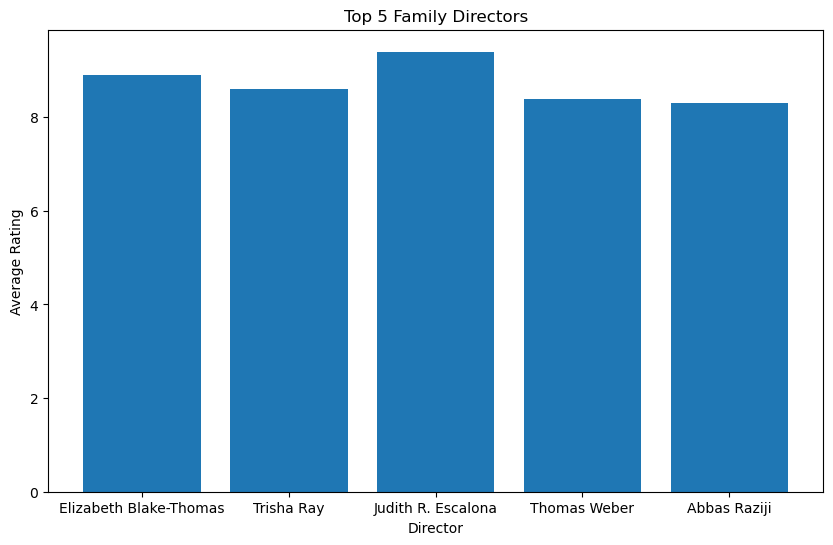

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.available
x = top_famdirectors['primary_name']
y = top_famdirectors['averagerating_avg']
director_count, ax = plt.subplots(figsize=(10, 6))
ax.bar(x,y)
abar_chart_title = ax.set_title('Top 5 Family Directors')
bar_chart_count_label = ax.set_ylabel('Average Rating')
bar_chart_series_label = ax.set_xlabel('Director')

In [61]:
fd = top_famdirectors.loc[top_famdirectors['averagerating'] > 8.2]
fd

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,averagerating_avg
632,tt7294234,5,nm6230910,director,None,None,Elizabeth Blake-Thomas,NaN,NaN,"producer,director,writer",Maybe I'm Fine,Maybe I'm Fine,2018,98.0,Family,9.2,39,8.9
1759,tt6226212,5,nm6230910,director,None,None,Elizabeth Blake-Thomas,NaN,NaN,"producer,director,writer",Sand Angels,Sand Angels,2018,71.0,Family,8.9,427,8.9
3487,tt6170432,5,nm6230910,director,None,None,Elizabeth Blake-Thomas,NaN,NaN,"producer,director,writer",The League of Legend Keepers: Shadows,The League of Legend Keepers: Shadows,2017,72.0,Family,8.6,410,8.9
814,tt3109222,5,nm2085641,director,None,None,Trisha Ray,NaN,NaN,"producer,editor,writer",Artisse,Artisse,2013,60.0,Family,9.1,11,8.6
133,tt3861388,5,nm5171392,director,None,None,Judith R. Escalona,NaN,NaN,"writer,director,editor",Bx3M,Bx3M,2016,103.0,"Drama,Family",9.4,5,9.4
5201,tt5174898,5,nm0916767,director,None,None,Thomas Weber,NaN,NaN,"producer,writer,director",Where the Fast Lane Ends,Where the Fast Lane Ends,2017,NaN,Family,8.4,5,8.4
6156,tt5906834,5,nm8310243,director,None,None,Abbas Raziji,NaN,NaN,"producer,production_designer,director",Cold Breath,Cold Breath,2017,84.0,"Drama,Family",8.3,10,8.3


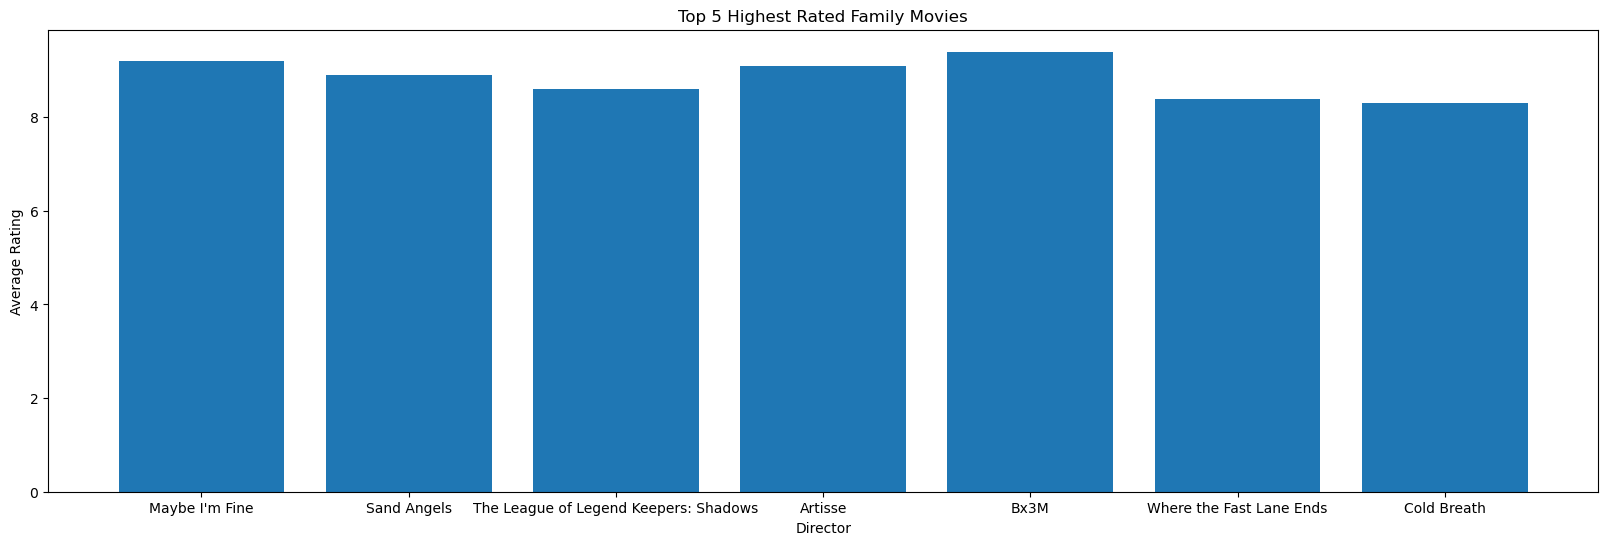

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.available
x = fd['primary_title']
y = fd['averagerating']
director_count, ax = plt.subplots(figsize=(20, 6))
ax.bar(x,y)
abar_chart_title = ax.set_title('Top 5 Highest Rated Family Movies')
bar_chart_count_label = ax.set_ylabel('Average Rating')
bar_chart_series_label = ax.set_xlabel('Director')

In [63]:
Fam = '''
SELECT *
FROM principals
JOIN persons
    USING(person_id)
JOIN movie_basics
    USING(movie_id)
JOIN movie_ratings
    USING(movie_id)
WHERE category == "director" 
ORDER BY averagerating DESC
'''
Fam = pd.read_sql(Fam,conn)
Fam
Fam = Fam.loc[(Fam['genres']== 'Family') | (Fam['genres']== 'Drama,Family')]
Fam = Fam.loc[Fam['averagerating']> 7.0]
Fam['sum_avg'] = Fam['averagerating'].mean()
Fam

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,sum_avg
133,tt3861388,5,nm5171392,director,None,None,Judith R. Escalona,NaN,NaN,"writer,director,editor",Bx3M,Bx3M,2016,103.0,"Drama,Family",9.4,5,7.884488
518,tt2662500,5,nm1898793,director,None,None,Kevin Tolbert,NaN,NaN,"producer,sound_department,director",Write Now,Write Now,2012,50.0,"Drama,Family",9.2,6,7.884488
552,tt5314484,5,nm1247364,director,None,None,Dan Hewitt Owens,1947.0,NaN,"producer,director,actor",Project: Puppies for Christmas,Project: Puppies for Christmas,2019,93.0,Family,9.2,16,7.884488
574,tt5311546,5,nm0542498,director,None,None,Mahesh Manjrekar,1953.0,NaN,"actor,writer,director",Natsamrat,Natsamrat,2016,166.0,"Drama,Family",9.2,4297,7.884488
596,tt7121844,5,nm1473098,director,None,None,Curt Hahn,NaN,NaN,"producer,director,writer",MacDonald Ranch,MacDonald Ranch,2017,48.0,Family,9.2,58,7.884488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25848,tt6081412,3,nm8455185,director,None,None,Yizhi Tan,NaN,NaN,director,Love Without Words,Love Without Words,2017,96.0,"Drama,Family",7.1,39,7.884488
25970,tt6926436,2,nm9014957,director,None,None,Yogi G. Raj,NaN,NaN,"director,costume_designer",Bangara s/o Bangarada Manushya,Bangara s/o Bangarada Manushya,2017,NaN,Family,7.1,63,7.884488
25995,tt9447768,5,nm5770597,director,None,None,Sunil Premarathne,NaN,NaN,"writer,art_director,director",Tawme iskole,Tawme iskole,2018,114.0,"Drama,Family",7.1,7,7.884488
26137,tt7514302,5,nm4661414,director,None,None,Param Shiv,NaN,NaN,"assistant_director,animation_department,director",Bhalwan Singh,Bhalwan Singh,2017,135.0,Family,7.1,40,7.884488


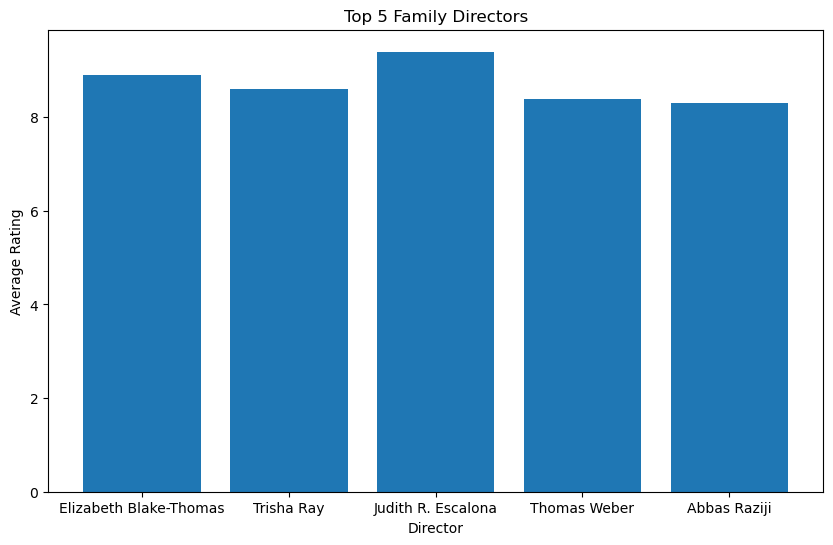

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.available
x = top_famdirectors['primary_name']
y = top_famdirectors['averagerating_avg']
director_count, ax = plt.subplots(figsize=(10, 6))
ax.bar(x,y)
abar_chart_title = ax.set_title('Top 5 Family Directors')
bar_chart_count_label = ax.set_ylabel('Average Rating')
bar_chart_series_label = ax.set_xlabel('Director')

## Genre Value Counts

In [65]:
q = '''
SELECT DISTINCT(movie_id),primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
FROM movie_basics
JOIN directors
    USING(movie_id)
JOIN known_for
    USING(movie_id)
JOIN movie_ratings
    USING(movie_id) 
'''
df = pd.read_sql(q,conn) #What person_id is associated with movie_id tt1770682,tt2632430,tt4109192,	tt4944240
df['genres'].value_counts().head(25)

Drama                            11403
Documentary                       9670
Comedy                            5388
Horror                            2608
Comedy,Drama                      2591
Thriller                          1535
Drama,Romance                     1501
Comedy,Romance                    1221
Comedy,Drama,Romance              1201
Horror,Thriller                    991
Drama,Thriller                     984
Action                             932
Romance                            682
Biography,Documentary              669
Documentary,Drama                  566
Comedy,Horror                      564
Action,Crime,Drama                 561
Documentary,Music                  540
Crime,Drama,Thriller               501
Crime,Drama                        486
Drama,Family                       468
Biography,Documentary,History      465
Family                             465
Documentary,History                455
Action,Drama                       388
Name: genres, dtype: int6

In [66]:
df.isna().sum() # Can drop runtime_minutes column and na genres rows

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7066
genres              614
averagerating         0
numvotes              0
dtype: int64

In [67]:
q = '''
SELECT DISTINCT(movie_id),primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
FROM movie_basics
JOIN directors
    USING(movie_id)
JOIN known_for
    USING(movie_id)
JOIN movie_ratings
    USING(movie_id) 
ORDER BY averagerating DESC 
LIMIT 10
'''
df = pd.read_sql(q,conn) #What person_id is associated with movie_id tt1770682,tt2632430,tt4109192,	tt4944240
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt1770682,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.0,"Crime,Documentary",10.0,5
1,tt2632430,Hercule contre Hermès,Hercule contre Hermès,2012,72.0,Documentary,10.0,5
2,tt4109192,I Was Born Yesterday!,I Was Born Yesterday!,2015,31.0,Documentary,10.0,6
3,tt4944240,Dog Days in the Heartland,Dog Days in the Heartland,2017,NaN,Drama,10.0,5
4,tt4960818,Revolution Food,Revolution Food,2015,70.0,Documentary,10.0,8
5,tt5089804,Fly High: Story of the Disc Dog,Fly High: Story of the Disc Dog,2019,65.0,Documentary,10.0,7
6,tt5344358,All Around Us,All Around Us,2019,NaN,Documentary,10.0,6
7,tt5390098,The Paternal Bond: Barbary Macaques,Atlas Mountain: Barbary Macaques - Childcaring...,2015,59.0,Documentary,10.0,5
8,tt6295832,Requiem voor een Boom,Requiem voor een Boom,2016,48.0,Documentary,10.0,5
9,tt6991826,A Dedicated Life: Phoebe Brand Beyond the Group,A Dedicated Life: Phoebe Brand Beyond the Group,2015,93.0,Documentary,10.0,5


In [68]:
df['genres'].value_counts().head(50)

Documentary          8
Crime,Documentary    1
Drama                1
Name: genres, dtype: int64

## Across All Categories

In [69]:
df = '''
SELECT *
FROM principals
JOIN persons
    USING(person_id)
JOIN movie_basics
    USING(movie_id)
JOIN movie_ratings
    USING(movie_id)
WHERE start_year == "2010"
ORDER BY averagerating DESC
'''
df = pd.read_sql(df,conn)

df = df.loc[df['genres']== "Comedy"]
df = df.loc[df['category']== "director"]
df

,movie_id,ordering,person_id,category,job,characters,primary_name,birth_year,death_year,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
854,tt1710392,5,nm3347454,director,None,None,Peter Koutsogeorgas,NaN,NaN,"miscellaneous,editor,director",Inventors and Vendors,Inventors and Vendors,2010,85.0,Comedy,8.8,9
891,tt1754335,5,nm1343668,director,None,None,Lucian Tion,NaN,NaN,"director,cinematographer,producer",Parastasul lui Viorel nu se mai tine aici,Parastasul lui Viorel nu se mai tine aici,2010,45.0,Comedy,8.8,19
997,tt0870208,5,nm1195914,director,None,None,Alpesh Patel,NaN,NaN,"editor,editorial_department,producer",Touch Wood,Touch Wood,2010,NaN,Comedy,8.7,15
1045,tt1430508,5,nm1940279,director,None,None,Matteo Ribaudo,NaN,NaN,"producer,director,writer",Silverlake Video: The Movie,Silverlake Video: The Movie,2010,89.0,Comedy,8.7,15
1156,tt1699706,5,nm4012859,director,None,None,Marc Maffei,NaN,NaN,"producer,composer,director",The Electroscheme,The Electroscheme,2010,80.0,Comedy,8.7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57575,tt1405807,5,nm1311302,director,None,None,Cyril Sebas,NaN,NaN,"director,writer",Le baltringue,Le baltringue,2010,86.0,Comedy,1.7,247
57625,tt1773029,5,nm1448482,director,None,None,Brett Kelly,1972.0,NaN,"actor,director,writer",Rockland,Rockland,2010,77.0,Comedy,1.6,76
57650,tt1648959,5,nm0839645,director,None,None,Alla Surikova,1940.0,NaN,"director,writer,producer",Chelovek s bulvara Kaputsinok,Chelovek s bulvara Kaputsinok,2010,106.0,Comedy,1.5,218
57680,tt1776979,5,nm0955133,director,None,None,Nikos Zervos,1950.0,NaN,"director,producer,writer",Show Bitch,Show Bitch,2010,84.0,Comedy,1.4,168


In [70]:
df['start_year'].value_counts()

2010    510
Name: start_year, dtype: int64

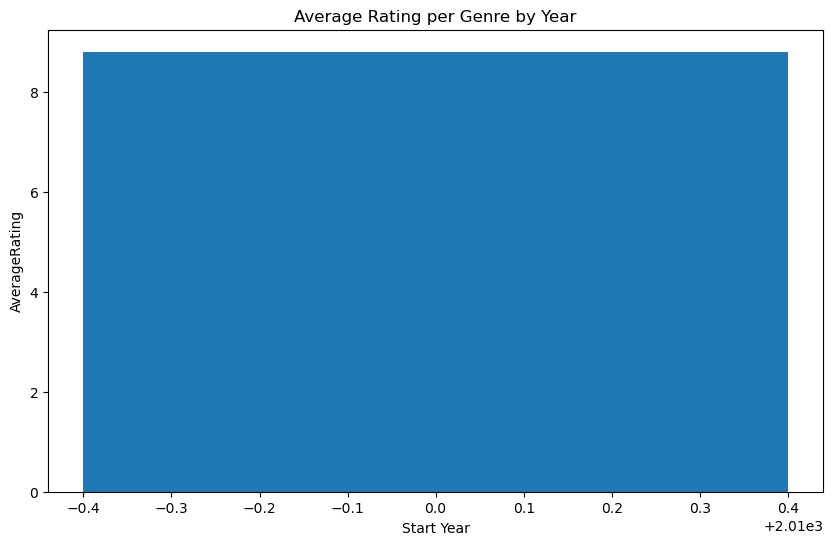

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.available
x = df['start_year']
y = df['averagerating']
director_count, ax = plt.subplots(figsize=(10, 6))
ax.bar(x,y)
abar_chart_title = ax.set_title('Average Rating per Genre by Year')
bar_chart_count_label = ax.set_ylabel('AverageRating')
bar_chart_series_label = ax.set_xlabel('Start Year')